# **Mushroom Attributes**
# **Решение задачи бинарной классификации грибов по их внешним параметрам**
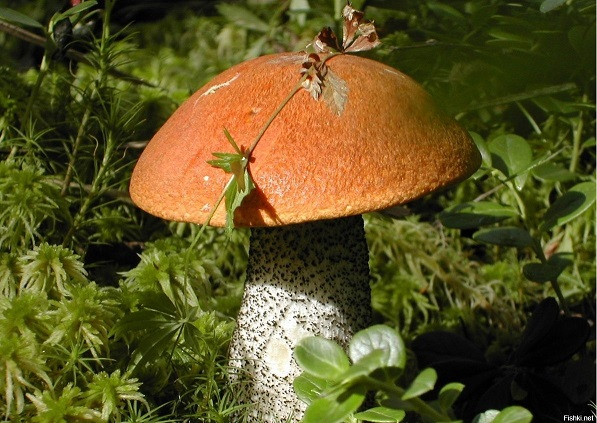

# **1.Постановка задачи**

**В работе проводится построение модели классификации грибов на съедобные и ядовитые**

**Датасет заимствован с платформы kaggle:**
https://www.kaggle.com/datasets/ulrikthygepedersen/mushroom-attributes?resource=download

В качестве параметров грибов рассматриваются следующие:

1. **cap-shape** - ***форма шляпки***: колокольчик=b, конический=c, выпуклый=x, плоский=f,  выпуклый=k,  утопленный=s
2. **cap-surface** - ***поверхность шляпки***: волокнистая = f, канавки = g, чешуйчатая = y, гладкая = s
3. **cap-color** - ***цвет шляпки***: коричневый = n, желтовато-коричневый = b, корица = c, серый = g, зеленый = r, розовый = p, фиолетовый = u, красный = e, белый = w, желтый = y
4. **bruises%3F** - ***синяки***: есть=t, нет=f
5. **odor** - ***запах***: миндаль=а, анис=l, креозот=с, рыбный=y, неприятный=f, затхлый=m, нет=n, острый=p, пряный=s
6. **gill-attachment** - ***прикрепление пластинок в гименофоре***: прикреплено = a, нисходящее = d, свободное = f, зубчатое = n
7. **gill-spacing** - ***расстояние между пластинками***: близко = c, тесно = w, далеко = d
8. **gill-size** - ***размер плаcтинок***: широкий=b, узкий=n
9. **gill-color** - ***цвет пластинок***: черный = k, коричневый = n, желтовато-коричневый = b, шоколадный = h, серый = g, зеленый = r, оранжевый = o, розовый = p, фиолетовый = u, красный = e,
10. **stalk-shape** - ***форма ножки***: увеличение = e, сужение = t
11. **stalk-root** - ***ножка-корень***: луковичный=b, клуб=с, чашка=u,равный=e, ризоморфы=z, укорененный=r, отсутствует=?
12.  **stalk-surface-above-ring** - ***поверхность ножки над кольцом***: волокнистая = f, чешуйчатая = y, шелковистая = k, гладкая = s
13. **stalk-surface-below-ring** - ***поверхность ножки под кольцом***: волокнистый = f, чешуйчатый = y, шелковистый = k, гладкий = s
14. **stalk-color-above-ring** - ***цвет ножки над кольцом***: коричневый = n, желтовато-коричневый = b, коричный = c, серый = g, оранжевый = o, розовый = p, красный = e, белый = w, желтый = y
15. **stalk-color-below-ring** - ***цвет ножки под кольцом***: коричневый = n, желтовато-коричневый = b, коричный = c, серый = g, оранжевый = o, розовый = p, красный = e, белый = w, желтый = y
16. **veil-type** - ***тип завесы***: частичное=p, универсальное=u
17. **veil-color** - ***цвет вуали***: коричневый=n, оранжевый=o, белый=w, желтый=y
18. **ring-number** - ***число колец***: нет=n, один=o, два=t
19. **ring-type** - ***кольцевой тип***: паутина = c, исчезающий = e, расклешенный = f, большой = l, нет = n, кулон = p, обшивка = s, зона = z
20. **spore-print-color** - ***цвет спорового отпечатка***: черный = k, коричневый = n, желтовато-коричневый = b, шоколадный = h, зеленый = r, оранжевый = o, фиолетовый = u, белый = w, желтый = y
21. **population** - ***популяция***: многочисленная = a, сгруппированная = c, многочисленная = n, рассеянная = s, несколько = v, одиночная = y
22. **habitat** - ***среда обитания***: трава=g, листья=l, луга=m, тропинки=p, город=u, отходы=w, леса=d


**Последний столбец датасета определяет класс гриба**
23. **class** - ***класс***: съедобные = e, ядовитые = p

Для работы с кодировщиком необходимо установить category_encoders

In [206]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [207]:
# Устанавливаем библиотеку
!pip install hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [208]:
# импорт библиотек
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn.model_selection import train_test_split #разделение выборки
from sklearn import preprocessing #предобработка
import category_encoders as ce # для работы с кодировщиками
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn import tree #модели деревьев решения
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import hyperopt
from hyperopt import hp, fmin, tpe, Trials
from sklearn import ensemble
from sklearn import model_selection #методы разделения и валидации
from sklearn import svm # для классификации методом опорных векторов
from sklearn.metrics import classification_report
# блок для применения методов ансамблей моделей
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
# блок для применения нейронной сети
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers


# **2. Исследование структуры данных**

In [209]:
data = pd.read_csv('mushroom.csv')
data.head()

cap-shape cap-surface cap-color bruises%3F  odor gill-attachment  \
0      b'x'        b's'      b'n'       b't'  b'p'            b'f'   
1      b'x'        b's'      b'y'       b't'  b'a'            b'f'   
2      b'b'        b's'      b'w'       b't'  b'l'            b'f'   
3      b'x'        b'y'      b'w'       b't'  b'p'            b'f'   
4      b'x'        b's'      b'g'       b'f'  b'n'            b'f'   

  gill-spacing gill-size gill-color stalk-shape  ... stalk-color-above-ring  \
0         b'c'      b'n'       b'k'        b'e'  ...                   b'w'   
1         b'c'      b'b'       b'k'        b'e'  ...                   b'w'   
2         b'c'      b'b'       b'n'        b'e'  ...                   b'w'   
3         b'c'      b'n'       b'n'        b'e'  ...                   b'w'   
4         b'w'      b'b'       b'k'        b't'  ...                   b'w'   

  stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                   b'w'      b'p'       b'w'        b'o'      b'p'   
1                   b'w'      b'p'       b'w'        b'o'      b'p'   
2                   b'w'      b'p'       b'w'        b'o'      b'p'   
3                   b'w'      b'p'       b'w'        b'o'      b'p'   
4                   b'w'      b'p'       b'w'        b'o'      b'e'   

  spore-print-color population habitat class  
0              b'k'       b's'    b'u'  b'p'  
1              b'n'       b'n'    b'g'  b'e'  
2              b'n'       b'n'    b'm'  b'e'  
3              b'k'       b's'    b'u'  b'p'  
4              b'n'       b'a'    b'g'  b'e'  

[5 rows x 23 columns]

##**Проверка на наличие пропусков в данных**

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises%3F                8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

Пропусков нет. 

##**Анализ статистических параметров данных**

In [211]:
data.describe()

cap-shape cap-surface cap-color bruises%3F  odor gill-attachment  \
count       8124        8124      8124       8124  8124            8124   
unique         6           4        10          2     9               2   
top         b'x'        b'y'      b'n'       b'f'  b'n'            b'f'   
freq        3656        3244      2284       4748  3528            7914   

       gill-spacing gill-size gill-color stalk-shape  ...  \
count          8124      8124       8124        8124  ...   
unique            2         2         12           2  ...   
top            b'c'      b'b'       b'b'        b't'  ...   
freq           6812      5612       1728        4608  ...   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top                      b'w'                   b'w'      b'p'       b'w'   
freq                     4464                   4384      8124       7924   

       ring-number ring-type spore-print-color population habitat class  
count         8124      8124              8124       8124    8124  8124  
unique           3         5                 9          6       7     2  
top           b'o'      b'p'              b'w'       b'v'    b'd'  b'e'  
freq          7488      3968              2388       4040    3148  4208  

[4 rows x 23 columns]

В данных присутствует столбец **veil-type** - ***тип завесы***, число уникальных значений которого равно 1, все значения столбца одинаковы - частичное=p. Таким образом, этот столбец неинформативен. Поэтому необходимо его удалить.

In [212]:
data = data.drop(['veil-type'], axis=1)

##**Проверка на наличие одинаковых строк**

In [213]:
data.drop_duplicates()
data.shape

(8124, 22)

Одинаковые строки отсутствуют

##**Проверка на сбалансированность данных**

b'e'    4208
b'p'    3916
Name: class, dtype: int64


<Axes: xlabel='class', ylabel='count'>

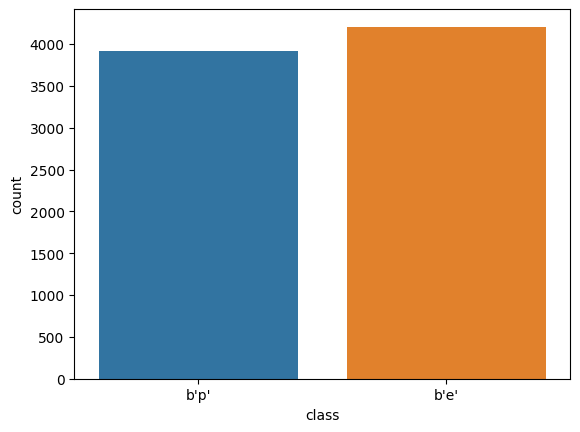

In [214]:
# соотношение классов в  данных. Проверка на сбалансированность.
print(data['class'].value_counts())
sns.countplot(data=data, x='class')

Данные сбалансированы

# **3. Предобработка данных**

##**Исследование корреляционных связей между признаками и целевой величиной**

Для построения корреляционной матрицы, проведем кодирование признаков

Так как признаков очень много, а уникальных значений признаков мало, для первичного осмотра проведем порядковое кодирование. 

In [215]:
ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(data)
data_bin.head()

cap-shape  cap-surface  cap-color  bruises%3F  odor  gill-attachment  \
0          1            1          1           1     1                1   
1          1            1          2           1     2                1   
2          2            1          3           1     3                1   
3          1            2          3           1     1                1   
4          1            1          4           2     4                1   

   gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0             1          1           1            1  ...   
1             1          2           1            1  ...   
2             1          2           2            1  ...   
3             1          1           2            1  ...   
4             2          2           1            2  ...   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                         1                       1                       1   
1                         1                       1                       1   
2                         1                       1                       1   
3                         1                       1                       1   
4                         1                       1                       1   

   veil-color  ring-number  ring-type  spore-print-color  population  habitat  \
0           1            1          1                  1           1        1   
1           1            1          1                  2           2        2   
2           1            1          1                  2           2        3   
3           1            1          1                  1           1        1   
4           1            1          2                  2           3        2   

   class  
0      1  
1      2  
2      2  
3      1  
4      2  

[5 rows x 22 columns]

Построение корреляционной матрицы признаков

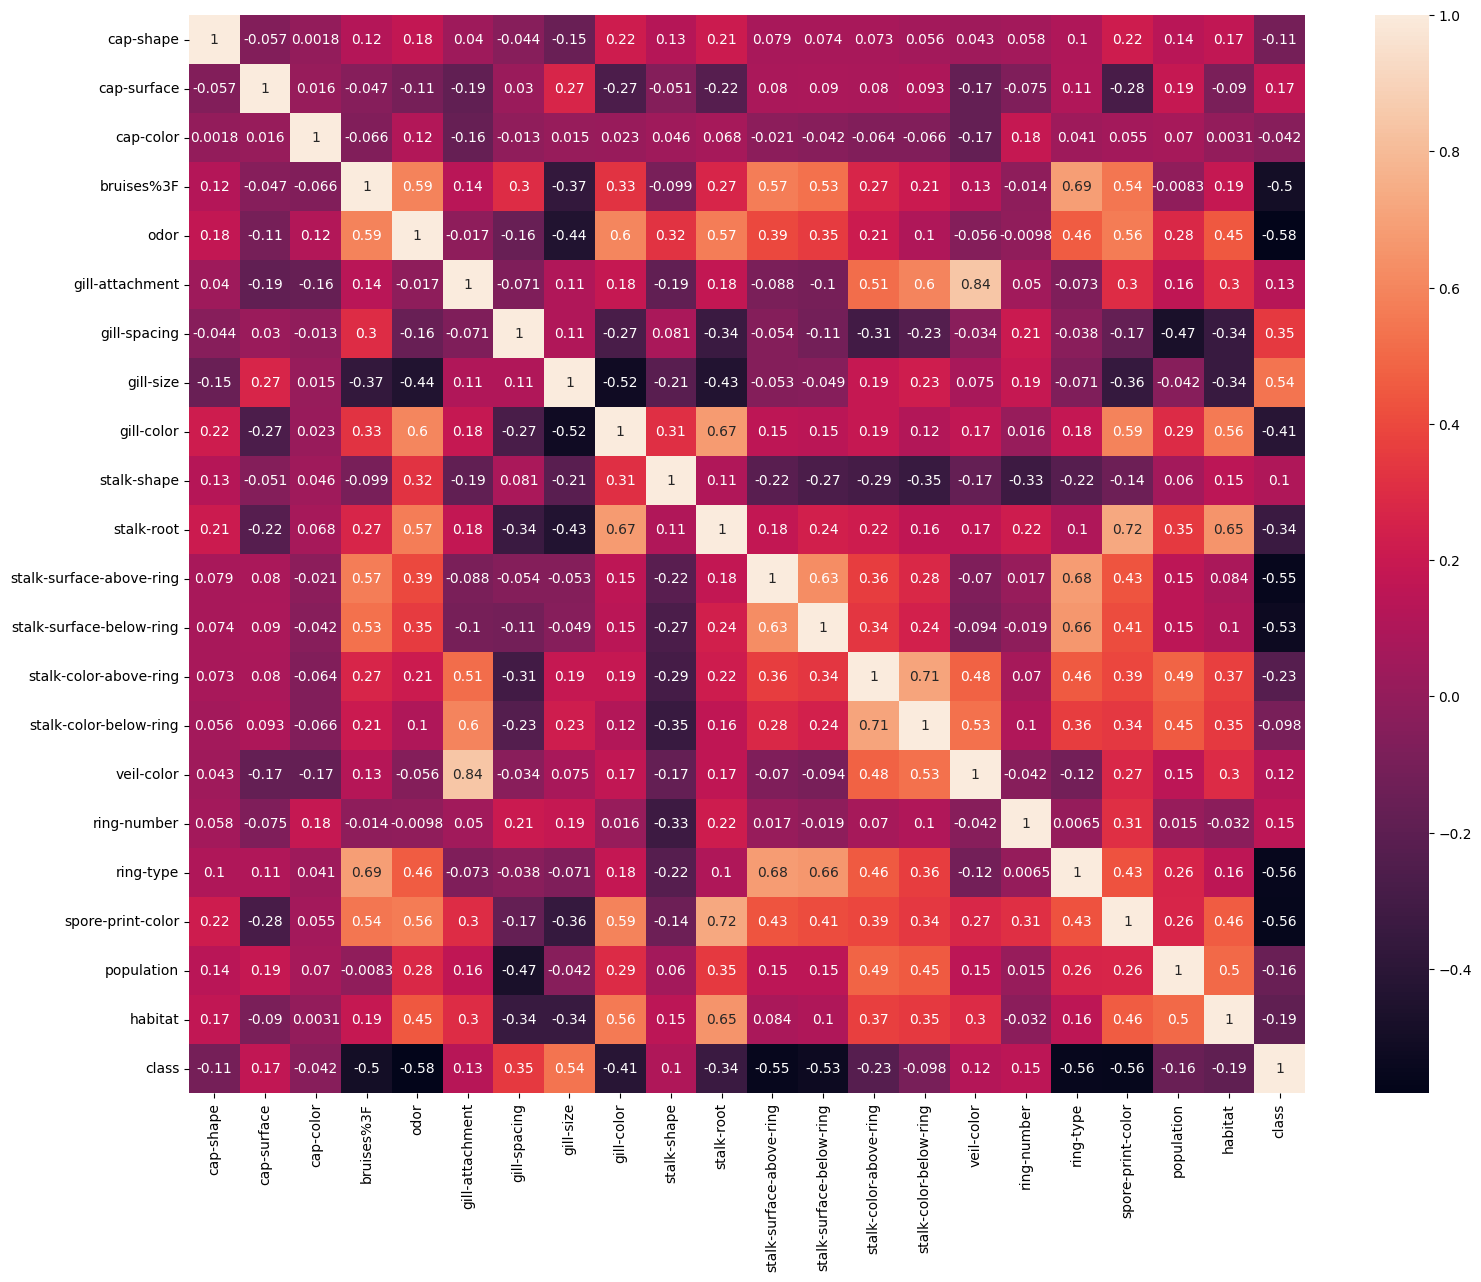

In [216]:
fig, ax = plt.subplots(figsize = (18, 14))
sns.heatmap(data_bin.corr(), annot=True);

Построение столбчатой диаграммы для ранжированных коэффициентов корреляции

[-0.5820154327236087, -0.5607152345831538, -0.5565147182889647, -0.5520436410013901, -0.5324522904205192, -0.501530377407558, -0.41286942564165174, -0.3375417049996689, -0.22529398127468256, -0.191296939725986, -0.15525371142554448, -0.11211031703516522, -0.09847579450544311, -0.04202825176197916, 0.10201901701656178, 0.12076593697596129, 0.1291998602678809, 0.1522608242966534, 0.16966305405172727, 0.3483867851842783, 0.5400243574330148, 1.0]


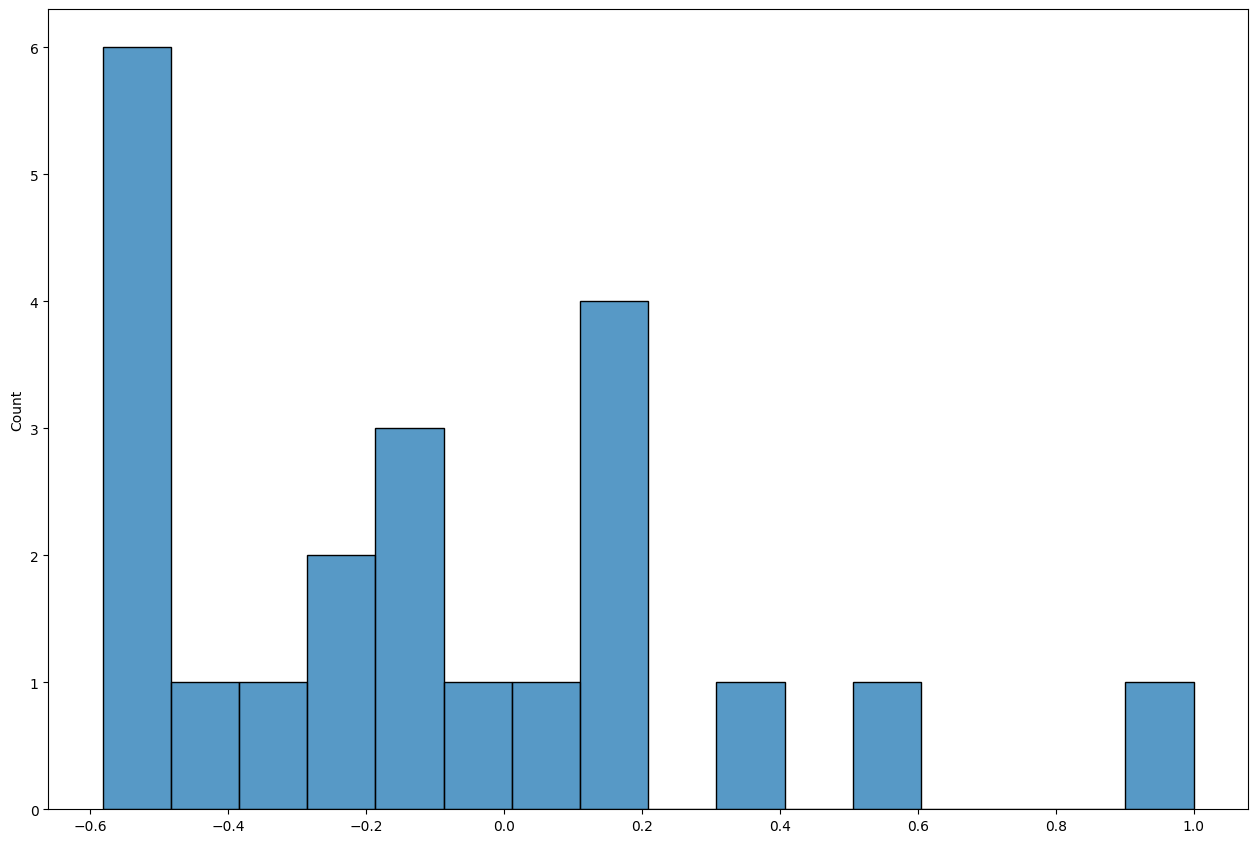

In [217]:
fig = plt.figure(figsize=(12,8))
axes = fig.add_axes([0,0,1,1])
cor_bin = data_bin.corr()
#print(type(cor_clean))
a= np.array(cor_bin ['class'])
a_sort= sorted(a)
print(a_sort)
histplot = sns.histplot(a_sort, bins= 16, ax=axes)

Ни мультиколлинеарности, ни утечки данных не видно.
К тому же модуль коэффициента корреляции для 6 признаков и целевым значением больше 0.5.

##**Проверка на наличие линейнозависимых строк корреляционной матрицы**

In [218]:
m= data_bin.corr().values
print(type(m))
np.linalg.matrix_rank(m)

<class 'numpy.ndarray'>


22

Матрица полного ранга, теперь нужно рассчитать определитель.


In [219]:
np.linalg.det(m)

1.761027836171339e-07

Как видно, значение определителя близко к 0, что свидетельствует о скрытой мультиколлениарности признаков. На самом деле матрица не является матрицей полного ранга. Нужно провести анализ и преобразование признаков.

##**Удаление неинформативных признаков**

Данные кажутся идеальными. Однако, если посмотреть внимательно на признаки, то можно увидеть, что многие из них являются неинформативными. Например, сложно однозначно определить запах гриба: что понимается под неприятным запахом, если при этом есть признаки рыбный и затхлый запах. Сложно однозначно заполнить этот признак. Тоже самое с расстоянием между пластинками на внутренней поверхности шляпки, как понять, они располагаются близко или тесно... Также с цветом пластинок и ножек гриба : как отличить коричневые пластинки от шоколадных? Также сложно определить тип прикрепления пластинок в гименофоре. Очень неоднозначно определен признак перехода от ножки в корень и признак типа вуали. 
А из-за неправильности заполнения этих признаков пользователем модели, может произойти неправильная классификация. А цена неправильной классификации в данном случае человеческая жизнь. Эти признаки нужно убрать.

Таким образом остаются только следующие информативные признаки

In [220]:
data_clean = data[['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'gill-size',
                   'stalk-shape', 'veil-color', 'ring-number','ring-type', 'population', 
                   'habitat', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'class']]

Проверка оставшихся признаков на информативность

b'w'    0.975382
b'n'    0.011817
b'o'    0.011817
b'y'    0.000985
Name: veil-color, dtype: float64


<Axes: xlabel='veil-color', ylabel='count'>

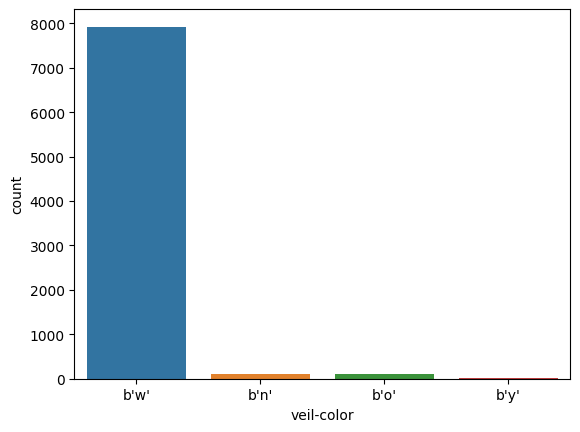

In [221]:
# соотношение данных в признаке "цвет завесы". Проверка на сбалансированность.
print(data_clean['veil-color'].value_counts(normalize=True))
sns.countplot(data=data_clean, x='veil-color')

Признак неинформативный, т.к. 97%  данных имеют значение "белый". Удаляем его.

In [222]:
data_clean = data_clean.drop(['veil-color'], axis=1)

b'o'    0.921713
b't'    0.073855
b'n'    0.004431
Name: ring-number, dtype: float64


<Axes: xlabel='ring-number', ylabel='count'>

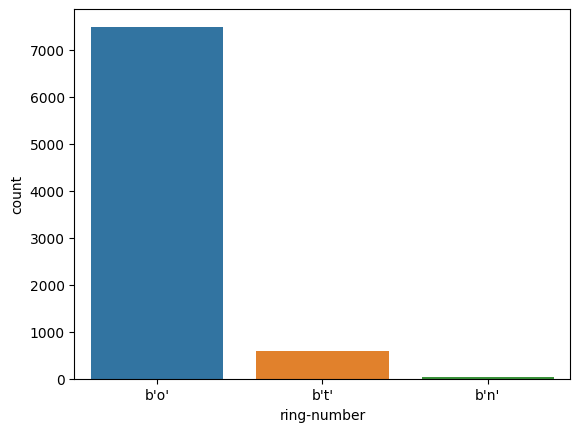

In [223]:
# соотношение данных в признаке "число колец". Проверка на сбалансированность.
print(data_clean['ring-number'].value_counts(normalize=True))
sns.countplot(data=data_clean, x='ring-number')

Признак подозрительный, т.к. 92% данных имеют значение "один"

In [224]:
# Проверка признака "число колец" на информативность
ring_number_ = data_clean[['ring-number', 'class']]

Рассмотрим, каким классам соответствует признак число колец равный двум. Может быть он является определяющим?

b'e'    0.88
b'p'    0.12
Name: class, dtype: float64


<Axes: xlabel='class', ylabel='count'>

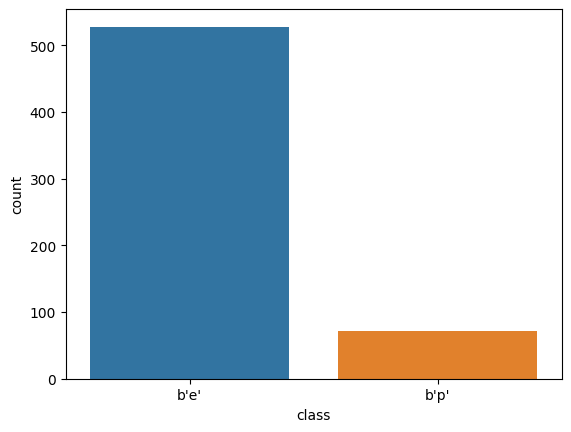

In [225]:
ring_number_data = ring_number_[ring_number_['ring-number']=="b't'"]
print(ring_number_data['class'].value_counts(normalize=True))
sns.countplot(data=ring_number_data, x='class')

Значение признака число колец равно двум может быть и у съедобных грибов и у ядовитых, поэтому можно считать, что признак "ring-number" также неинформативен

In [226]:
data_clean = data_clean.drop(['ring-number'], axis=1)

In [227]:
data_clean.describe()

cap-shape cap-surface cap-color bruises%3F gill-size stalk-shape  \
count       8124        8124      8124       8124      8124        8124   
unique         6           4        10          2         2           2   
top         b'x'        b'y'      b'n'       b'f'      b'b'        b't'   
freq        3656        3244      2284       4748      5612        4608   

       ring-type population habitat stalk-surface-above-ring  \
count       8124       8124    8124                     8124   
unique         5          6       7                        4   
top         b'p'       b'v'    b'd'                     b's'   
freq        3968       4040    3148                     5176   

       stalk-surface-below-ring class  
count                      8124  8124  
unique                        4     2  
top                        b's'  b'e'  
freq                       4936  4208

##**Проверка на возможность сочетания признаков для формирования новых**

Рассмотрим два признака, на которые люди чаще всего обращают внимание при сборе грибов, то что видно сразу: форма и цвет гриба.
Построим тепловые карты для этих двух признаков и посмотрим, каких грибов в разряде съедобных и несъедобных появляется больше

Text(0.5, 1.0, 'Тепловая карта yes')

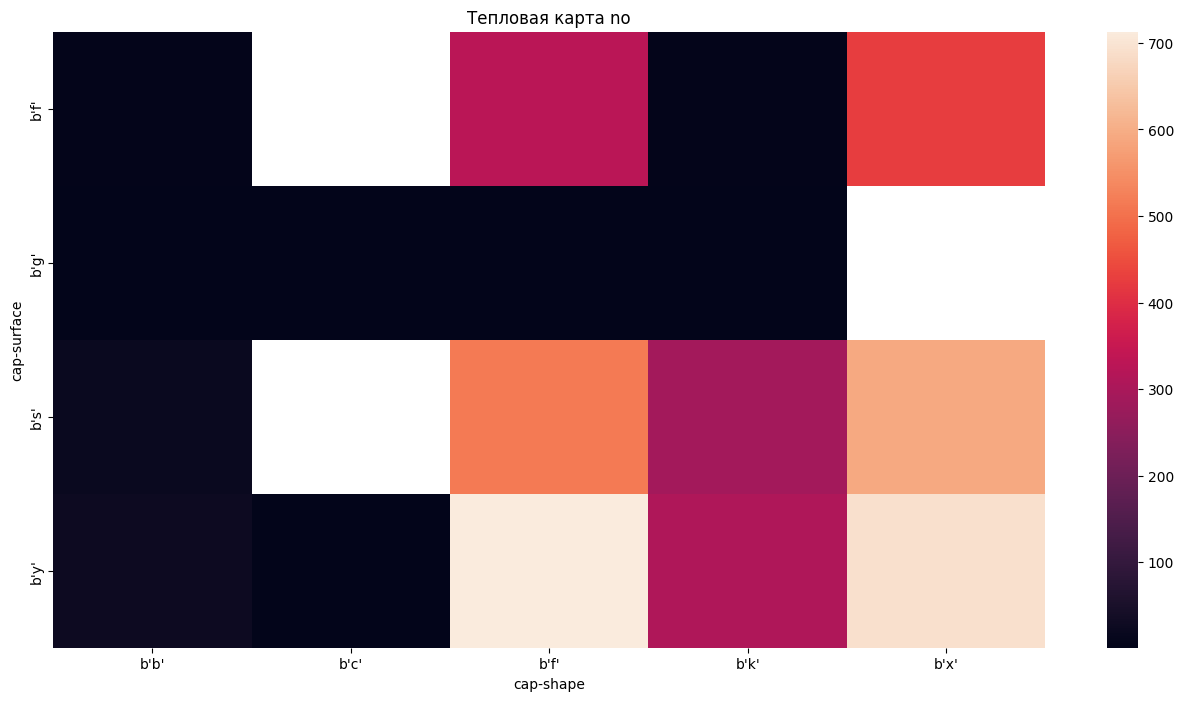

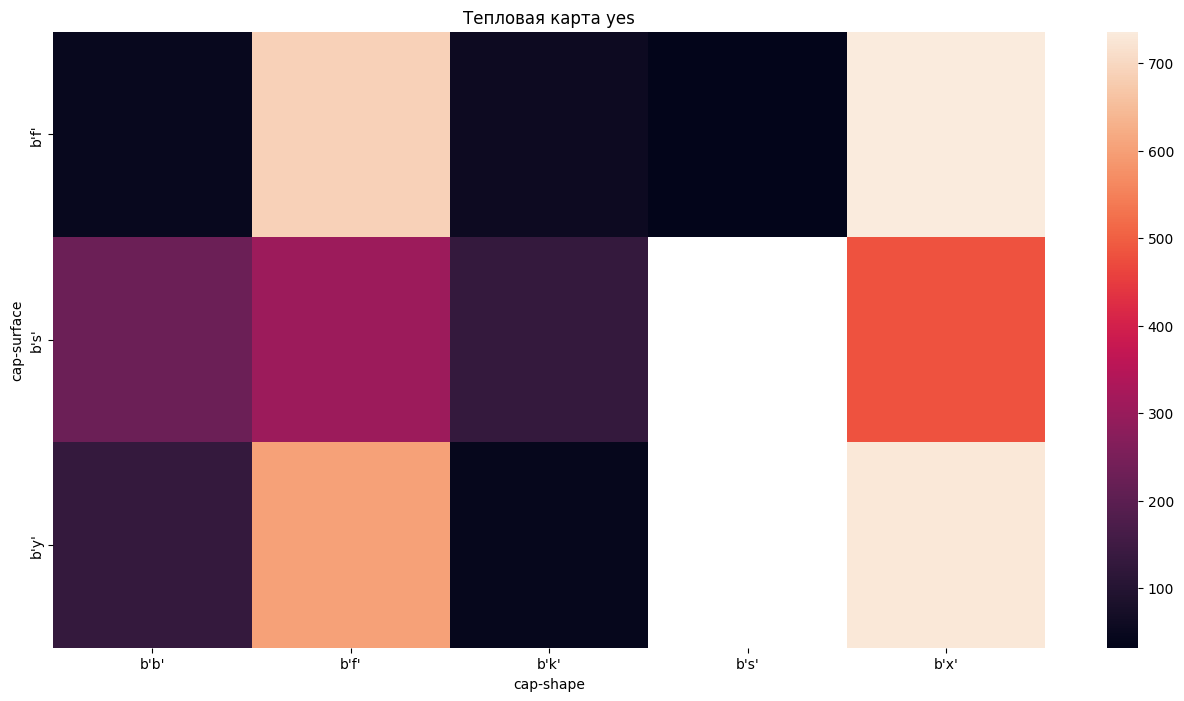

In [228]:
# Делим таблицу на две части: для съедобных грибов и не съедобных
data_no = data_clean[data_clean['class']=="b'p'"]
data_yes = data_clean[data_clean['class']=="b'e'"]

pivot_v_o =data_no.pivot_table(
    values = 'class',
    columns = 'cap-shape' ,
    index = 'cap-surface',
    aggfunc = 'count'
)
plt.figure(figsize=(16,8))
heatmap = sns.heatmap(data = pivot_v_o)
heatmap.set_title('Тепловая карта no')


pivot_v_y =data_yes.pivot_table(
    values = 'class',
    columns = 'cap-shape' ,
    index = 'cap-surface',
    aggfunc = 'count'
)
plt.figure(figsize=(16,8))
heatmap = sns.heatmap(data = pivot_v_y)
heatmap.set_title('Тепловая карта yes')

In [229]:
pivot_v_o

cap-shape    b'b'  b'c'   b'f'   b'k'   b'x'
cap-surface                                 
b'f'          4.0   NaN  328.0    4.0  424.0
b'g'          1.0   1.0    1.0    1.0    NaN
b's'         18.0   NaN  514.0  288.0  592.0
b'y'         25.0   3.0  713.0  307.0  692.0

In [230]:
pivot_v_y

cap-shape     b'b'   b'f'   b'k'  b's'   b'x'
cap-surface                                  
b'f'          48.0  688.0   56.0  32.0  736.0
b's'         226.0  306.0  130.0   NaN  482.0
b'y'         130.0  602.0   42.0   NaN  730.0

Анализ тепловых карт показывает, что возможно сочетание признаков форма и поверхность шляпки могут оказаться определяющими классификационными признаками. Например, среди съедобных грибов в заданной выборке не встречается представителей с поверхностью шляпки, содержащей канавки, но представителей грибов с такими признаками в рассматриваемом датасете всего 4. Тоже самое можно сказать про коническую форму шляпки. Таким образом, эти признаки хотелось бы рассмотреть подробнее на большем количестве входных данных. На данный момент выделить эти признаки как определяющие сложно из-за малой статистики.

**Построение корреляционной матрицы после удаления неинформативных признаков**

In [231]:
ord_encoder = ce.OrdinalEncoder()
data_clean_bin = ord_encoder.fit_transform(data_clean)
data_clean_bin.head()

cap-shape  cap-surface  cap-color  bruises%3F  gill-size  stalk-shape  \
0          1            1          1           1          1            1   
1          1            1          2           1          2            1   
2          2            1          3           1          2            1   
3          1            2          3           1          1            1   
4          1            1          4           2          2            2   

   ring-type  population  habitat  stalk-surface-above-ring  \
0          1           1        1                         1   
1          1           2        2                         1   
2          1           2        3                         1   
3          1           1        1                         1   
4          2           3        2                         1   

   stalk-surface-below-ring  class  
0                         1      1  
1                         1      2  
2                         1      2  
3                         1      1  
4                         1      2

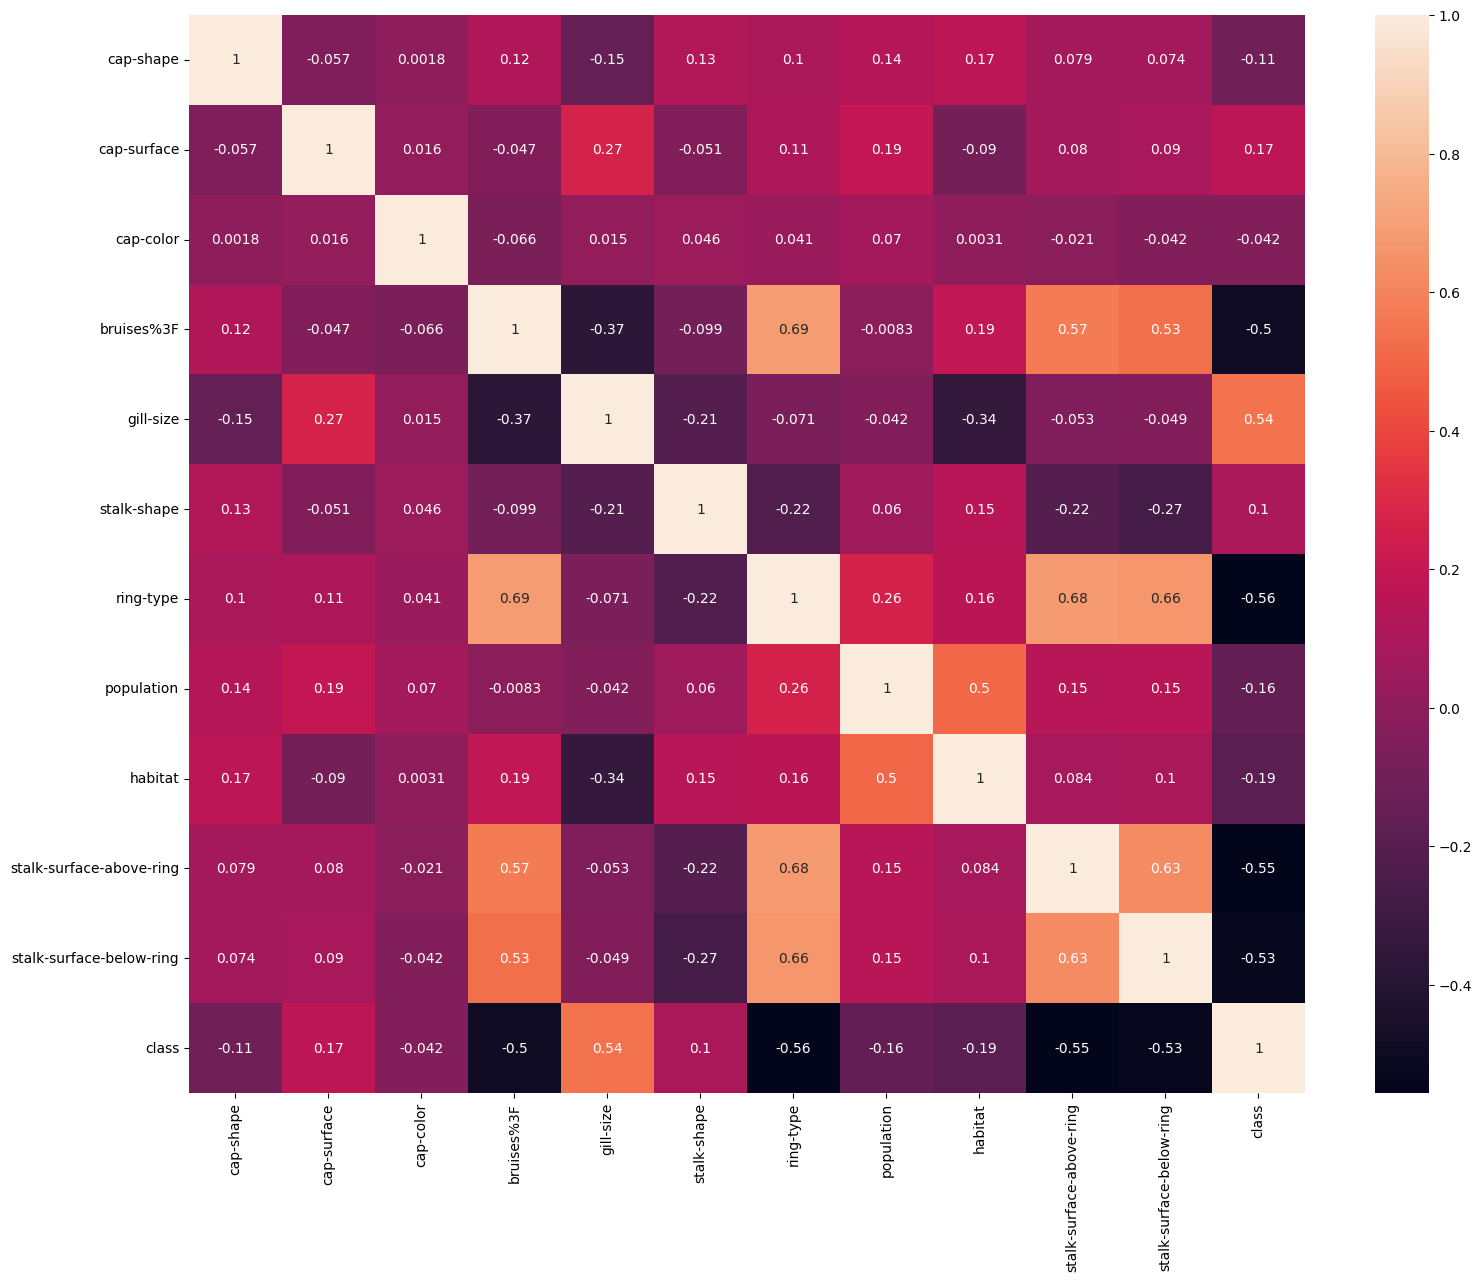

In [232]:
fig, ax = plt.subplots(figsize = (18, 14))
sns.heatmap(data_clean_bin.corr(), annot=True);

In [233]:
m= data_clean_bin.corr().values
print(type(m))
np.linalg.matrix_rank(m)

<class 'numpy.ndarray'>


12

Матрица полного ранга

In [234]:
np.linalg.det(m)

0.01243159352947707

Детерминант стал значительно лучше, но все равно близок к нулю. Как видно из коррелящионной матрицы, это из-за того, что некоторые признаки все еще сильно зависимы. Для выявления признаков можно посмотреть корреляционную матрицу перекодированных признаков

# **4. Преобразование данных**

##**Перевод класса объекта в бинарный вид 0/1**

In [235]:
data_clean['class_b'] = data_clean['class'].apply(lambda x: 1 if x == "b'e'" else 0)
data_clean = data_clean.drop(['class'], axis=1)
data_clean['class_b'].unique()

array([0, 1])

Теперь если класс равен 1, то гриб съедобный, если класс равен 0, гриб ядовитый

##**Перевод остальных признаков в числовой вид**

Тоже самое сделаем с признаками, у которых всего два возможных значения. 

In [236]:
data_clean['bruises%3F_b'] = data_clean['bruises%3F'].apply(lambda x: 1 if x == "b'f'" else 0)
data_clean = data_clean.drop(['bruises%3F'], axis=1)
data_clean['bruises%3F_b'].unique()

array([0, 1])

In [237]:
data_clean['gill-size_b'] = data_clean['gill-size'].apply(lambda x: 1 if x == "b'b'" else 0)
data_clean = data_clean.drop(['gill-size'], axis=1)
data_clean['gill-size_b'].unique()

array([0, 1])

In [238]:
data_clean['stalk-shape_b'] = data_clean['stalk-shape'].apply(lambda x: 1 if x == "b't'" else 0)
data_clean = data_clean.drop(['stalk-shape'], axis=1)
data_clean['stalk-shape_b'].unique()

array([0, 1])

Над остальными признаками проведем операцию однократного кодирования

In [239]:
# создаем дамми-переменные

ind_shape = pd.get_dummies(data_clean[['cap-shape','cap-surface', 'cap-color', 
                                       'ring-type', 'population', 'habitat', 'stalk-surface-above-ring', 
                                       'stalk-surface-below-ring']],
                                       prefix=['cap_shape','cap_surface','cap_color', 
                                              'ring_type','population', 'habitat', 'stalk_above_ring', 
                                              'stalk_below_ring'])
data_clean = pd.concat([data_clean, ind_shape], axis=1) 


data_clean = data_clean.drop(['cap-shape','cap-surface', 'cap-color', 
                              'ring-type', 'population', 'habitat', 'stalk-surface-above-ring', 
                              'stalk-surface-below-ring'],
                              axis = 1) 

print(data_clean.head())


   class_b  bruises%3F_b  gill-size_b  stalk-shape_b  cap_shape_b'b'  \
0        0             0            0              0               0   
1        1             0            1              0               0   
2        1             0            1              0               1   
3        0             0            0              0               0   
4        1             1            1              1               0   

   cap_shape_b'c'  cap_shape_b'f'  cap_shape_b'k'  cap_shape_b's'  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   cap_shape_b'x'  ...  habitat_b'u'  habitat_b'w'  stalk_above_ring_b'f'  \
0               1  ...             1             0                      0  

##**Построение корреляционной матрицы после перекодировки**

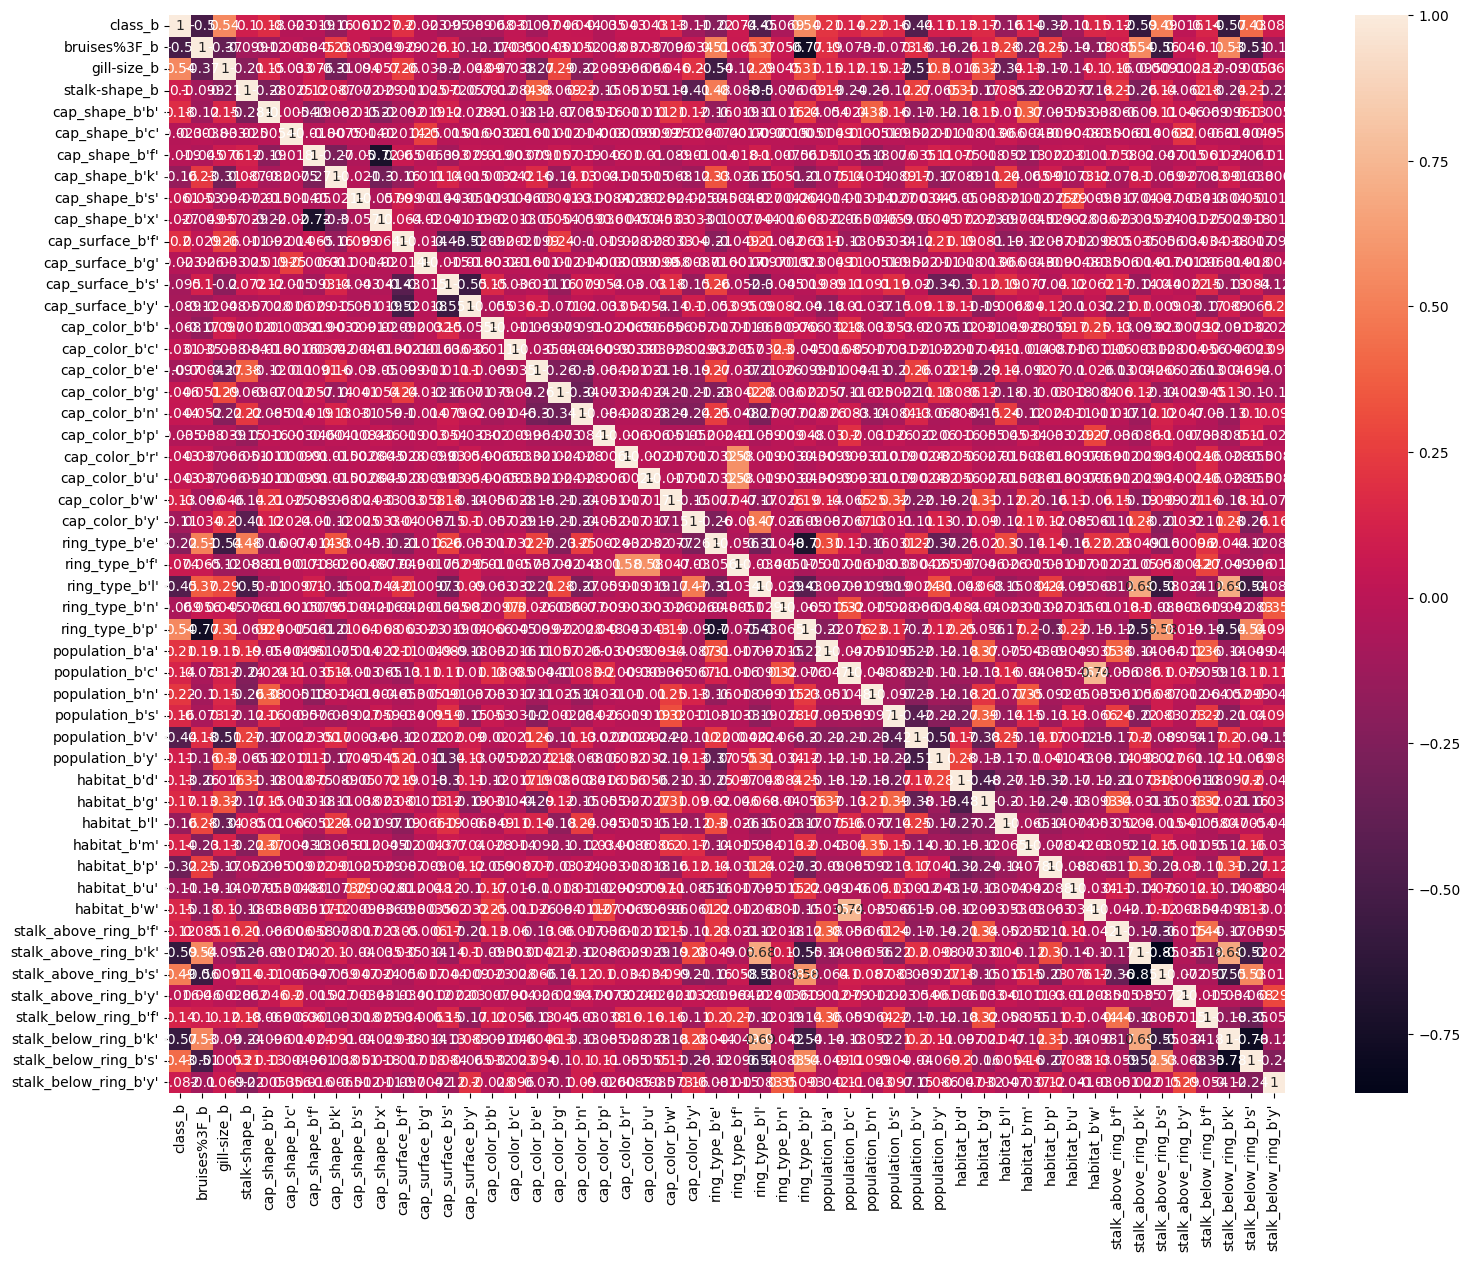

In [240]:
fig, ax = plt.subplots(figsize = (18, 14))
sns.heatmap(data_clean.corr(), annot=True);

Построение столбчатой диаграммы для ранжированных коэффициентов корреляции

[-0.5876582576306926, -0.5735240117095758, -0.5015303774075575, -0.45161906631733206, -0.4437223790553417, -0.32334578692874977, -0.22328591679316376, -0.163565080856209, -0.1551495328922169, -0.11301388688237908, -0.11207815283453391, -0.09711241151696133, -0.09545448428230008, -0.08867702391665111, -0.06915876083185807, -0.067544045176165, -0.03470228376929973, -0.02300745096225608, -0.023007450962255947, -0.018525863881447186, 0.016198352236787953, 0.026885747348740493, 0.03091030279334442, 0.042853529523685645, 0.04285352952368581, 0.044359882701506044, 0.046455786462839405, 0.06066392808020007, 0.0743713970253801, 0.08167385587597348, 0.10201901701655966, 0.10705486060476398, 0.11950320307201834, 0.1261231199145528, 0.13368288213884577, 0.13678187461175828, 0.1376448547202147, 0.13862663152253327, 0.1500868827567864, 0.1595715965399437, 0.16500414599799437, 0.18256668950511265, 0.19541477669456364, 0.21487139719906026, 0.21952922241349798, 0.4254440458550034, 0.49131418071169586, 

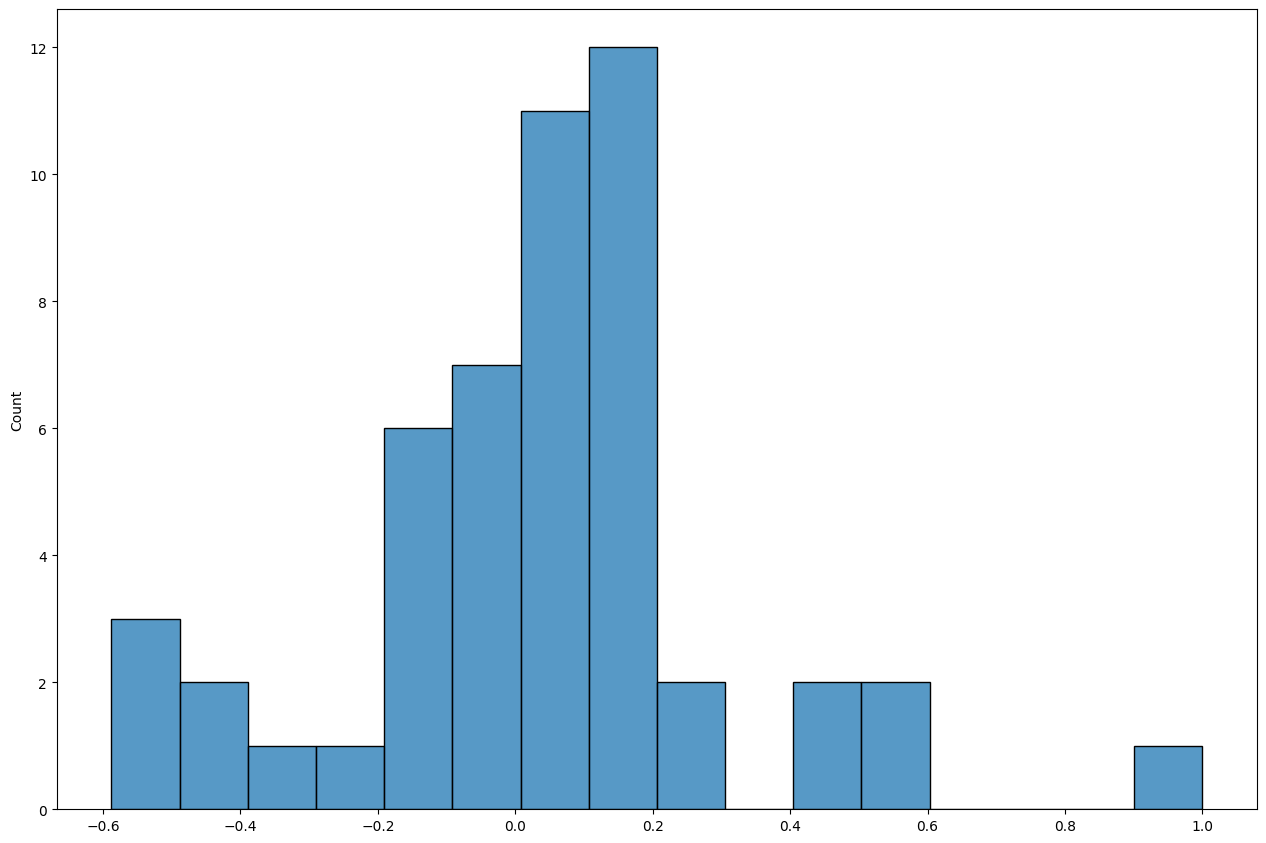

In [241]:
fig = plt.figure(figsize=(12,8))
axes = fig.add_axes([0,0,1,1])
cor_bin = data_clean.corr()

a= np.array(cor_bin ['class_b'])
a_sort= sorted(a)
print(a_sort)
histplot = sns.histplot(a_sort, bins= 16, ax=axes)

Как видно из графиков, сильнозависимых признаков нет. Единица на столбчатой диаграмме отображает автокорреляцию целевого признака.

Проверим ранг матрицы и детерминант

In [242]:
m= data_clean.corr().values
print(type(m))
print('Ранг матрицы:', np.linalg.matrix_rank(m))
print('размер матрицы:', m.shape)

<class 'numpy.ndarray'>
Ранг матрицы: 42
размер матрицы: (50, 50)


In [243]:
np.linalg.det(m)

1.719658453452639e-124

Определеитель ожидаемо равен нулю, поскольку матрица неполного ранга.

**Выделим из DataFrame целевой признак**

In [244]:
X = data_clean.drop(['class_b'], axis=1)
y = data_clean['class_b']

##**Отбор информативных признаков**

In [245]:
# с помощью SelectKBest отберем 41 наиболее подходящих признаков 
#(оставим количество признаков, соответствующее рангу матрицы)
selector = SelectKBest(f_classif, k=41)
X_new = selector.fit_transform(X, y)

# Создаем и обучаем selector 
selector.fit(X, y)  
idxs_selected = selector.get_support(indices=True) 
# Создаем новый DataFrame
mask = selector.get_support() 
new_features = X.columns[mask] 
print(idxs_selected)
print(new_features)


[ 0  1  2  3  6  7  9 11 12 13 15 16 17 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48]
Index(['bruises%3F_b', 'gill-size_b', 'stalk-shape_b', 'cap_shape_b'b'',
       'cap_shape_b'k'', 'cap_shape_b's'', 'cap_surface_b'f'',
       'cap_surface_b's'', 'cap_surface_b'y'', 'cap_color_b'b'',
       'cap_color_b'e'', 'cap_color_b'g'', 'cap_color_b'n'', 'cap_color_b'u'',
       'cap_color_b'w'', 'cap_color_b'y'', 'ring_type_b'e'', 'ring_type_b'f'',
       'ring_type_b'l'', 'ring_type_b'n'', 'ring_type_b'p'', 'population_b'a'',
       'population_b'c'', 'population_b'n'', 'population_b's'',
       'population_b'v'', 'population_b'y'', 'habitat_b'd'', 'habitat_b'g'',
       'habitat_b'l'', 'habitat_b'm'', 'habitat_b'p'', 'habitat_b'u'',
       'habitat_b'w'', 'stalk_above_ring_b'f'', 'stalk_above_ring_b'k'',
       'stalk_above_ring_b's'', 'stalk_below_ring_b'f'',
       'stalk_below_ring_b'k'', 'stalk_below_ring_b's'',
       'stalk_below_ring_b'y''],
   

In [246]:
X_ = X[new_features]

**Построение корреляционной матрицы после отбора признаков**

In [247]:
data_kbest = pd.concat([X_, y], axis=1) 

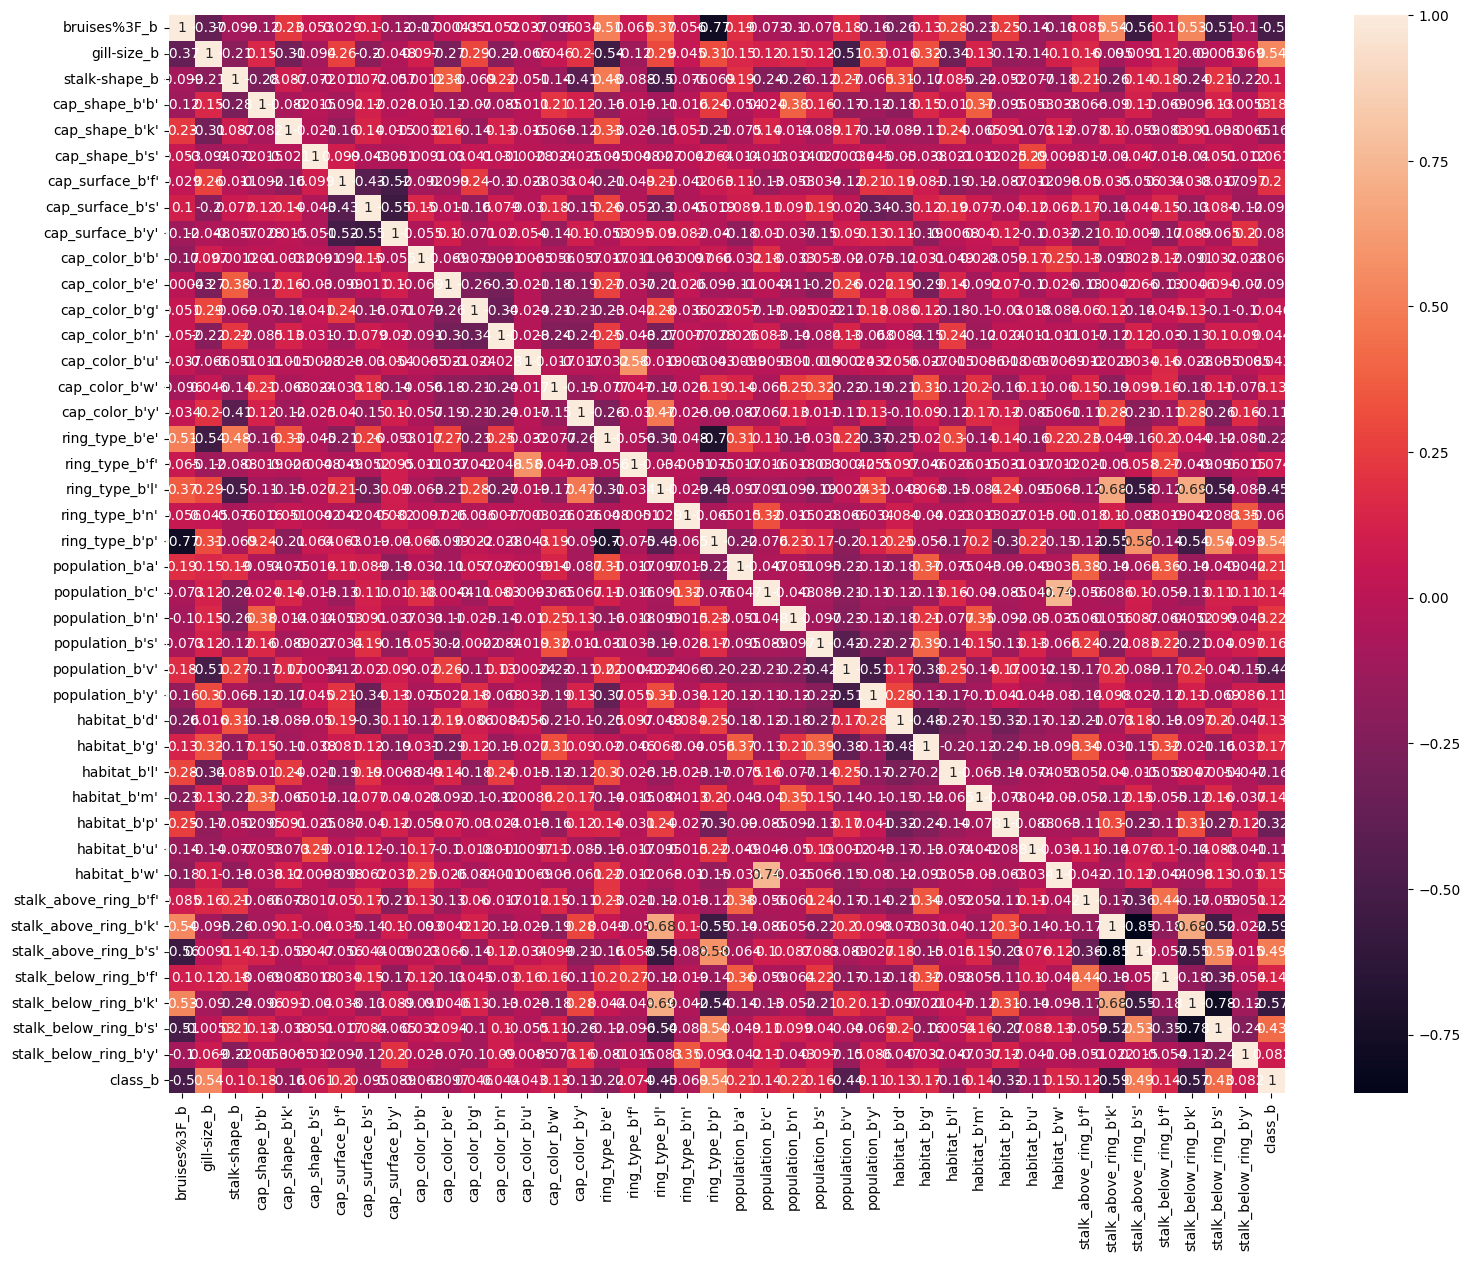

In [248]:
fig, ax = plt.subplots(figsize = (18, 14))
sns.heatmap(data_kbest.corr(), annot=True);

In [249]:
m= data_kbest.corr().values
print(type(m))
print('Ранг матрицы:', np.linalg.matrix_rank(m))
print('размер матрицы:', m.shape)

<class 'numpy.ndarray'>
Ранг матрицы: 38
размер матрицы: (42, 42)


In [250]:
np.linalg.det(m)

-3.342220903654676e-72

Ранг матрицы меньше ее размерности опять, значит метод Kbest выбрал не те признаки, попробуем метод RFE

Метод RFE

In [251]:
#Создаём объект класса LogisticRegression
log_reg = linear_model.LogisticRegression(random_state=42, max_iter=1000)
# Применяем метод RFE
selector = RFE(log_reg, n_features_to_select=41, step=1)
selector = selector.fit(X, y)
 
selector.get_feature_names_out()

array(['bruises%3F_b', 'gill-size_b', 'stalk-shape_b', "cap_shape_b'c'",
       "cap_shape_b'k'", "cap_shape_b's'", "cap_shape_b'x'",
       "cap_surface_b'f'", "cap_surface_b'g'", "cap_surface_b's'",
       "cap_color_b'b'", "cap_color_b'c'", "cap_color_b'n'",
       "cap_color_b'p'", "cap_color_b'r'", "cap_color_b'u'",
       "cap_color_b'y'", "ring_type_b'e'", "ring_type_b'f'",
       "ring_type_b'l'", "ring_type_b'n'", "ring_type_b'p'",
       "population_b'a'", "population_b'c'", "population_b'n'",
       "population_b's'", "population_b'v'", "population_b'y'",
       "habitat_b'd'", "habitat_b'g'", "habitat_b'm'", "habitat_b'p'",
       "habitat_b'u'", "habitat_b'w'", "stalk_above_ring_b'f'",
       "stalk_above_ring_b'k'", "stalk_above_ring_b's'",
       "stalk_above_ring_b'y'", "stalk_below_ring_b'f'",
       "stalk_below_ring_b's'", "stalk_below_ring_b'y'"], dtype=object)

In [252]:
X_RFE = X[selector.get_feature_names_out()] 
data_RFE = pd.concat([X_RFE, y], axis=1) 

**Построение корреляционной матрицы после отбора признаков**

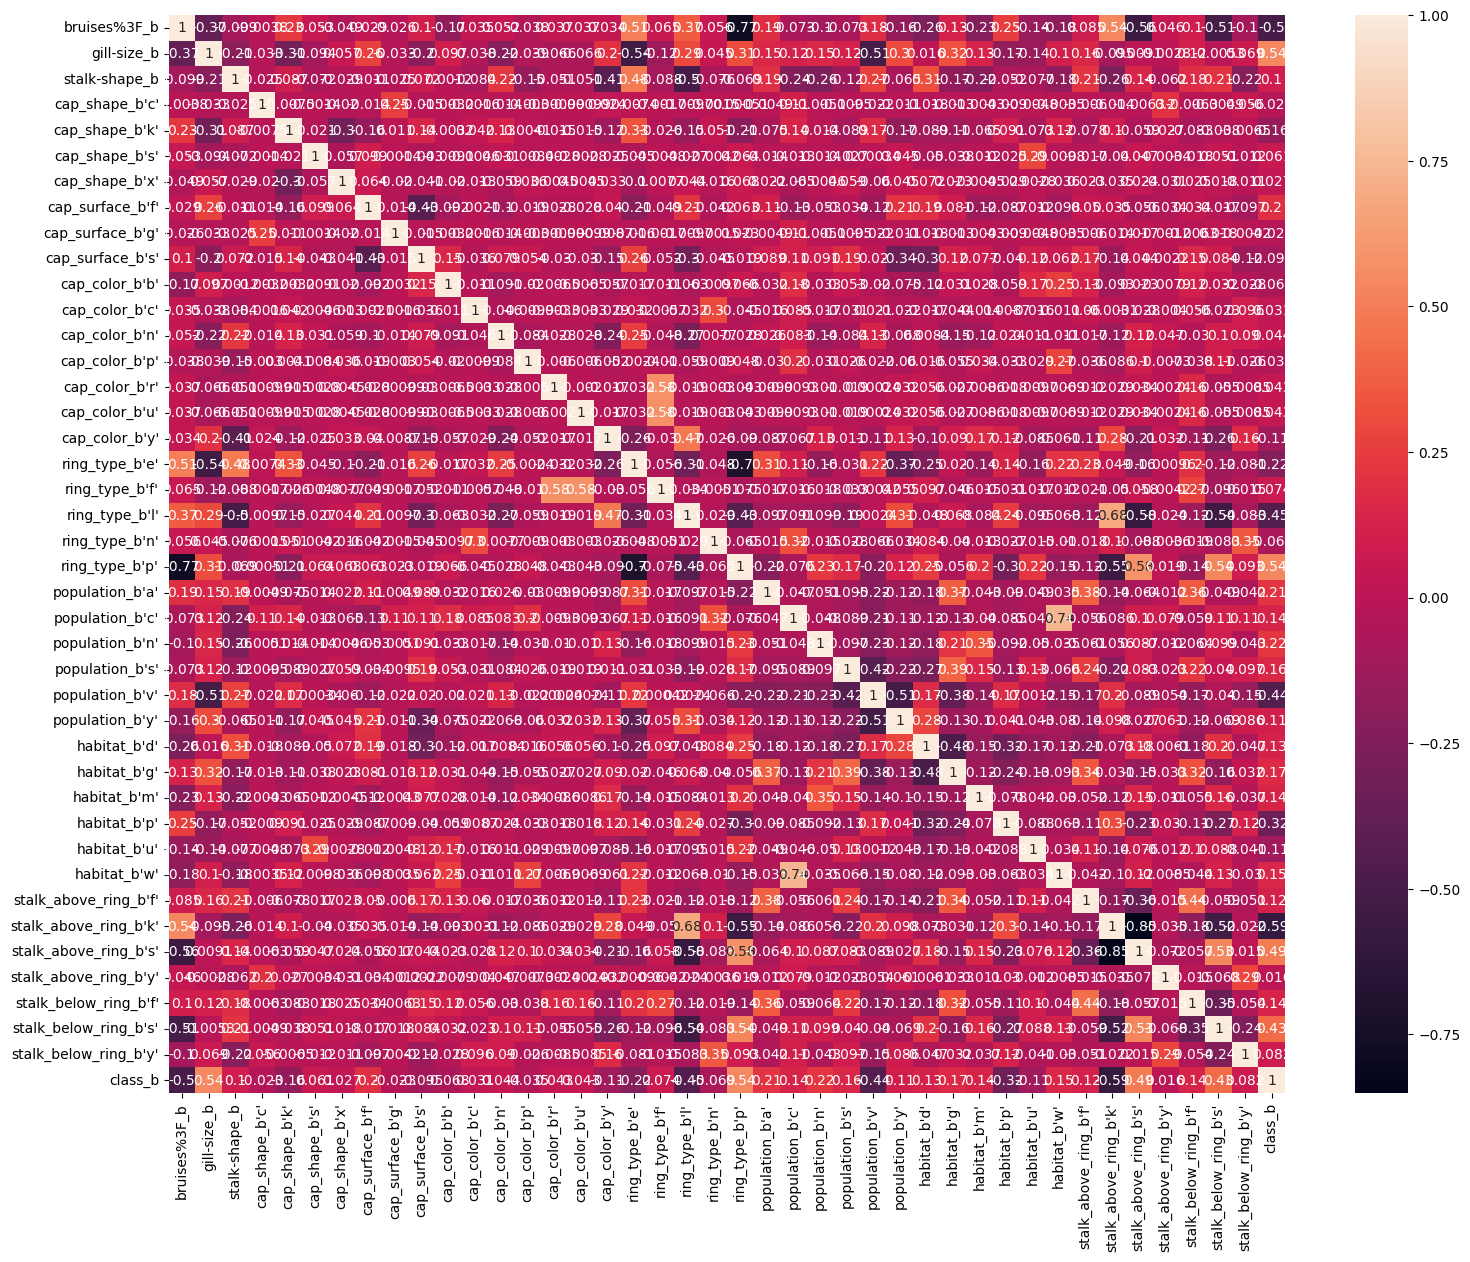

In [253]:
fig, ax = plt.subplots(figsize = (18, 14))
sns.heatmap(data_RFE.corr(), annot=True);

In [254]:
m= data_RFE.corr().values
print(type(m))
print('Ранг матрицы:', np.linalg.matrix_rank(m))
print('размер матрицы:', m.shape)

<class 'numpy.ndarray'>
Ранг матрицы: 39
размер матрицы: (42, 42)


In [255]:
np.linalg.det(m)

-1.9668498014517545e-53

Опять не получили матрицу полного ранга. Попробуем оставить меньше признаков. Для этого реализуем перебор в цикле.

##**Определение оптимального числа признаков.**

In [256]:
# Метод RFE
for i in range(41, 3,-1):
    # Применяем метод RFE
    selector = RFE(log_reg, n_features_to_select=i, step=1)
    selector = selector.fit(X, y)
    X_RFE = X[selector.get_feature_names_out()] 
    data_RFE_ = pd.concat([X_RFE, y], axis=1)
    m= data_RFE_.corr().values
    print(f'Ранг= {np.linalg.matrix_rank(m)}, размер матрицы {m.shape[0]}, определитель= {np.linalg.det(m)}')
    if(np.linalg.matrix_rank(m)==m.shape[0] and np.linalg.det(m)>0.01):
      break

print('Число признаков:', i)
print('Отобранные признаки:',selector.get_feature_names_out())    

Ранг= 39, размер матрицы 42, определитель= -1.9668498014517545e-53
Ранг= 38, размер матрицы 41, определитель= -1.637340521200576e-53
Ранг= 37, размер матрицы 40, определитель= -4.0982278400704386e-53
Ранг= 36, размер матрицы 39, определитель= -2.633430293662814e-53
Ранг= 35, размер матрицы 38, определитель= -2.4464655394658724e-53
Ранг= 35, размер матрицы 37, определитель= 2.2831520952037952e-39
Ранг= 34, размер матрицы 36, определитель= 8.197129616372757e-39
Ранг= 33, размер матрицы 35, определитель= 3.9262081607792994e-38
Ранг= 32, размер матрицы 34, определитель= 4.805024853712155e-38
Ранг= 31, размер матрицы 33, определитель= 1.8659814463560364e-37
Ранг= 30, размер матрицы 32, определитель= 4.6997520353411435e-37
Ранг= 29, размер матрицы 31, определитель= 2.5387142363280035e-36
Ранг= 28, размер матрицы 30, определитель= 5.82229016552094e-36
Ранг= 28, размер матрицы 29, определитель= 5.466429558519374e-21
Ранг= 27, размер матрицы 28, определитель= 1.2197815497648589e-20
Ранг= 26, ра

In [257]:
# Метод K-best
for i in range(41, 2,-1):
    # Применяем метод RFE
    selector = SelectKBest(f_classif, k=i)
    X_Kbest = selector.fit_transform(X, y)
    selector.fit(X, y)
    idxs_selected = selector.get_support(indices=True) 
    mask = selector.get_support() 
    new_features = X.columns[mask]
    X_Kbest = X[new_features]

    data_Kbest = pd.concat([X_Kbest, y], axis=1)
    m= data_Kbest.corr().values

    print(f'Ранг= {np.linalg.matrix_rank(m)}, размер матрицы {m.shape[0]}, определитель= {np.linalg.det(m)}')
    if(np.linalg.matrix_rank(m)==m.shape[0] and np.linalg.det(m)>0.01):
      break

print('Число признаков:', i)      
print('Отобранные признаки:',selector.get_feature_names_out()) 

Ранг= 38, размер матрицы 42, определитель= -3.342220903654676e-72
Ранг= 37, размер матрицы 41, определитель= -5.509799550826402e-72
Ранг= 36, размер матрицы 40, определитель= -6.609957061288709e-71
Ранг= 35, размер матрицы 39, определитель= -1.1578750091569253e-70
Ранг= 34, размер матрицы 38, определитель= -1.811411346013403e-70
Ранг= 33, размер матрицы 37, определитель= -2.1763519945525593e-70
Ранг= 33, размер матрицы 36, определитель= 4.146731374955177e-57
Ранг= 32, размер матрицы 35, определитель= 1.6716149146007593e-56
Ранг= 32, размер матрицы 34, определитель= 5.472126484751054e-43
Ранг= 31, размер матрицы 33, определитель= 2.795857466796379e-40
Ранг= 30, размер матрицы 32, определитель= 4.667189605673224e-40
Ранг= 29, размер матрицы 31, определитель= 5.965871721878751e-40
Ранг= 28, размер матрицы 30, определитель= 5.497818712125734e-39
Ранг= 28, размер матрицы 29, определитель= 1.0364235267968937e-24
Ранг= 28, размер матрицы 28, определитель= 4.0055800455643866e-11
Ранг= 27, разм

Из сопоставления результатов алгоритмов отбора признаков видно, что алгоритм Kbest уступает в качестве отбора признаков алгоритму RFE, что видно из значения определителя корреляционной матрицы признаков.
При использовании алгоритма RFE уже для матрицы из 10 признаков (+1 целевой) значение определителя больше 0.06, тогда как Kbest даёт значение определителя  меньше 0.041 даже при уменьшении количества признаков до 5.
Следовательно, далее будем работать с результатами алгоритма RFE для 10 классификационных признаков.  

# **5. Решение задачи классификации: стандартные модели**

##**Логистическая регрессия**

***Логистическая регрессия с параметрами по умолчанию и кросс валидацией***

In [258]:
#Создаём объект класса LogisticRegression
log_reg = linear_model.LogisticRegression(random_state=42, max_iter=1000)

#Создаём объект кросс-валидатора KFold
kf = model_selection.KFold(n_splits=5, shuffle  = True, random_state = 42)
 
#Считаем метрики accuracy на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=log_reg, #модель
    X=X_RFE, #матрица наблюдений X
    y=y, #вектор ответов y
    cv=kf, #кросс-валидатор
    scoring='accuracy', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
print('Train k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics['test_score'])))

Train k-fold mean accuracy: 0.95
Valid k-fold mean accuracy: 0.95


In [259]:
#Считаем метрики f1 на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=log_reg, #модель
    X=X_RFE, #матрица наблюдений X
    y=y, #вектор ответов y
    cv=kf, #кросс-валидатор
    scoring='f1', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
print('Train k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['test_score'])))

Train k-fold mean f1: 0.96
Valid k-fold mean f1: 0.96


Итого. Где-то 4-5 человек из 100 могут отравиться, используя эту модель. 

***Автоматический подобор оптимальных параметров***

In [260]:
# Разобьем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_RFE, y, stratify=y, test_size=0.3, random_state=42) 

In [261]:
# Проверим, стритифицированы ли они
print('Train :', y_train.value_counts(normalize=True))
print('\n')
print('Test :', y_test.value_counts(normalize=True))

Train : 1    0.517939
0    0.482061
Name: class_b, dtype: float64


Test : 1    0.518048
0    0.481952
Name: class_b, dtype: float64


In [262]:
# построим сетку значений гиперпараметров
param_grid = [    
               {'penalty': ['l2', 'none'] , # тип регуляризации
              'solver': ['lbfgs', 'sag'], # алгоритм оптимизации
               'C': [0.001, 0.002, 0.005, 0.01, 0.015, 0.2]}, # уровень силы регуляризации
              
              {'penalty': ['l1', 'l2'] ,
              'solver': ['liblinear', 'saga'],
               'C': [0.0005, 0.003, 0.005, 0.008, 0.01, 0.015, 0.2, 0.3]}
            ]


In [263]:
# используем GridSearchCV для поиска оптимальных параметров
grid_search = GridSearchCV(
        estimator=linear_model.LogisticRegression(
        random_state=42, #генератор случайных чисел
        max_iter=1000 #количество итераций на сходимость
    ), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)
 

In [264]:
# обучение модели
grid_search.fit(X_train, y_train) 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid=[{'C': [0.001, 0.002, 0.005, 0.01, 0.015, 0.2],
                          'penalty': ['l2', 'none'],
                          'solver': ['lbfgs', 'sag']},
                         {'C': [0.0005, 0.003, 0.005, 0.008, 0.01, 0.015, 0.2,
                                0.3],
                          'penalty': ['l1', 'l2'],
                          'solver': ['liblinear', 'saga']}])

In [265]:
print("Наилучшие значения параметров: {}".format(grid_search.best_params_))

Наилучшие значения параметров: {'C': 0.001, 'penalty': 'none', 'solver': 'lbfgs'}


In [266]:
print("accuracy на тренировочном наборе: {:.2f}".format(grid_search.score(X_train, y_train)))
print("accuracy на тестовом наборе: {:.2f}".format(grid_search.score(X_test, y_test)))

accuracy на тренировочном наборе: 0.95
accuracy на тестовом наборе: 0.96


In [267]:
y_train_pred = grid_search.predict(X_train)
print('f1_score на тренировочном наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = grid_search.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
 

f1_score на тренировочном наборе: 0.96
f1_score на тестовом наборе: 0.96


Даже при лучших параметрах метрики модели логистической регрессии не превышают 0,96

##**Решающие деревья**

***Решающее дерево с параметрами по умолчанию  и кросс валидацией***

In [268]:
#Создаём объект класса DecisionTreeClassifier
dt_clf = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности 
    random_state=42 #генератор случайных чисел
)

#Создаём объект кросс-валидатора KFold
kf = model_selection.KFold(n_splits=5, shuffle  = True, random_state = 42)
 
#Считаем метрики accuracy на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=dt_clf, #модель
    X=X_RFE, #матрица наблюдений X
    y=y, #вектор ответов y
    cv=kf, #кросс-валидатор
    scoring='accuracy', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
print('Train k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics['test_score'])))


Train k-fold mean accuracy: 0.96
Valid k-fold mean accuracy: 0.96


In [269]:
#Считаем метрики f1 на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=dt_clf, #модель
    X=X_RFE, #матрица наблюдений X
    y=y, #вектор ответов y
    cv=kf, #кросс-валидатор
    scoring='f1', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
print('Train k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['test_score'])))

Train k-fold mean f1: 0.96
Valid k-fold mean f1: 0.96


Посмотрим различные максимальные глубины деревьев и найдем глубину дерева, 
для которой будет максимальное значение метрики accuracy, но при этом ещё не будет наблюдаться переобучения.
Построим функцию, которая принимает глубины деревьев  и матрицу с признаками объектов и возвращает accuracy.

0.9514597256419275


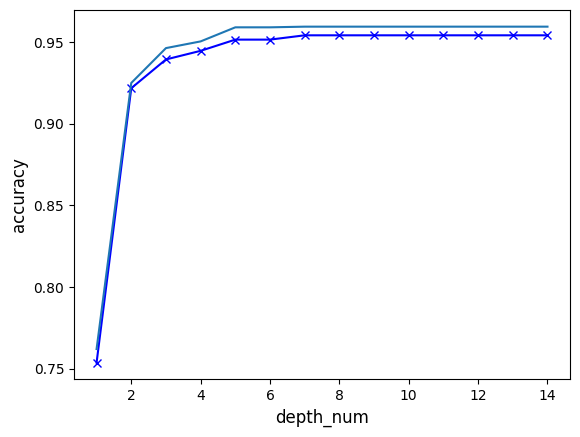

In [270]:
def get_accur(depth_num, X, y, X_test, y_test):
    # инициализируем алгоритм классификации
    dt = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности 
    max_depth = depth_num, # максимальная глубина дерева
    random_state=42 #генератор случайных чисел
    )
    # запускаем алгоритм 
    dt.fit(X, y)
    y_pred = dt.predict(X)
    # находим значение accuracy для тренировочной выборки
    acc = metrics.accuracy_score(y, y_pred)
    y_pred_t = dt.predict(X_test)
    # находим значение accuracy для тестовой выборки
    acc_t = metrics.accuracy_score(y_test, y_pred_t)
    # возвращаем значение accuracy
    return acc, acc_t

# создаём пустой список для значений accuracy для тренировочной и тестовой выборок
accur_train = []
accur_test = []
# итерируемся по разным глубинам деревьев(от 1 до 9) и сохраняем значение accuracy для тренировочной выборки
for depth_num in range(1, 15):
# сохраняем значения
    acc, acc_t=get_accur(depth_num, X_train, y_train, X_test, y_test)
    accur_train.append(acc)
    accur_test.append(acc_t)
print (accur_train[5])

# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("depth_num", fontsize=12)
plt.ylabel("accuracy", fontsize=12)
# рисуем изменение инерции
plt.plot([i for i in range(1, 15)], accur_train, 'xb-')
plt.plot([i for i in range(1, 15)], accur_test)


Видно, что, как для тренировочной, так и для тестовой выборок с ростом глубины дерева до 5 метрика accuracy растет, а потом практически не меняется 

Попробуем подобрать параметры

In [271]:
# подбор оптимальных параметры с помощью gridsearch
param_grid = [
              {'criterion':['entropy', 'gini'],
                'max_depth': [5, 6, 7, 8],
               'min_samples_split': [2, 5, 7, 10]}  
             ]

grid_search = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(
    random_state=42 #генератор случайных чисел
    ),
    param_grid=param_grid,
    cv=5, 
    n_jobs = -1   
)
grid_search.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [5, 6, 7, 8],
                          'min_samples_split': [2, 5, 7, 10]}])

In [272]:
print("Наилучшие значения параметров: {}".format(grid_search.best_params_))
print("accuracy на тренировочном наборе: {:.2f}".format(grid_search.score(X_train, y_train)))
print("accuracy на тестовом наборе: {:.2f}".format(grid_search.score(X_test, y_test)))
y_train_pred = grid_search.predict(X_train)
print('f1_score на тренировочном наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = grid_search.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Наилучшие значения параметров: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 2}
accuracy на тренировочном наборе: 0.95
accuracy на тестовом наборе: 0.96
f1_score на тренировочном наборе: 0.96
f1_score на тестовом наборе: 0.96


Результат тот же, где-то 4-5 человек из 100 могут отравиться, если будут использовать результаты этой модели

***Попробуем найти оптимальный порог вероятности для модели с лучшими параметрами***

---



In [273]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=2, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел 
)
#Обучаем модель
model.fit(X_train, y_train)
#Создаём кросс-валидатор k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
#Делаем предсказание вероятностей на кросс-валидации
y_cv_proba_pred = model_selection.cross_val_predict(model, X_train, y_train, cv=skf, method='predict_proba')

In [274]:
#Выделяем столбец с вероятностями для класса 1 
y_cv_proba_pred = y_cv_proba_pred[:, 1]

Построение PR кривой

In [275]:
#Вычисляем координаты PR-кривой
precision, recall, thresholds = metrics.precision_recall_curve(y_train, y_cv_proba_pred)


Best threshold = 0.67, F1-Score = 0.96


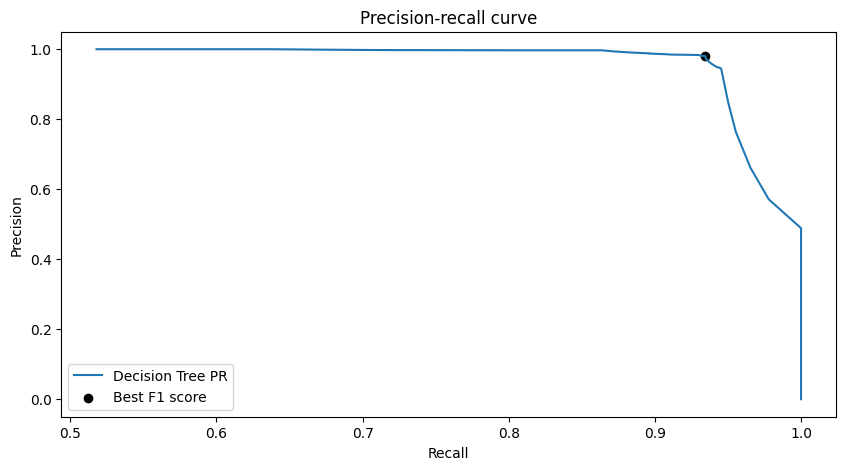

In [276]:
#Вычисляем F1-score при различных порогах
f1_scores = (2 * precision * recall) / (precision + recall)
#Определяем индекс максимума
idx = np.argmax(f1_scores)
print('Best threshold = {:.2f}, F1-Score = {:.2f}'.format(thresholds[idx], f1_scores[idx]))
#Строим PR-кривую
fig, ax = plt.subplots(figsize=(10, 5)) 
#Строим линейный график зависимости precision от recall
ax.plot(precision, recall, label='Decision Tree PR')
#Отмечаем точку максимума F1
ax.scatter(precision[idx], recall[idx], marker='o', color='black', label='Best F1 score')
#Даём графику название и подписываем оси
ax.set_title('Precision-recall curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
#Отображаем легенду
ax.legend();

In [277]:
#Делаем предсказание класса
y_pred = model.predict(X_train)
#Задаём оптимальный порог вероятностей
threshold_opt = 0.67
#Грибы, для которых вероятность быть съедобными > 0.67, относим к классу 1
#В противном случае — к классу 0
#Для удобства завернём numpy-массив в Pandas Series
y_pred = pd.Series(y_pred)
y_pred_opt = y_pred.apply(lambda x: 1 if x > threshold_opt else 0)
#Считаем метрики
print(metrics.classification_report(y_train, y_pred_opt))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2741
           1       0.93      0.98      0.96      2945

    accuracy                           0.95      5686
   macro avg       0.96      0.95      0.95      5686
weighted avg       0.96      0.95      0.95      5686



Результат остался прежним.

##**Метод опорных векторов**

***Метод опорных векторов с параметрами по умолчанию и кросс валидацией***

In [278]:
# рассмотрим нелинейный метод опорных векторов
clf = svm.NuSVC(gamma='auto')
#Создаём объект кросс-валидатора KFold
kf = model_selection.KFold(n_splits=5, shuffle  = True, random_state = 42)
 
#Считаем метрики accuracy на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=clf , #модель
    X=X_RFE, #матрица наблюдений X
    y=y, #вектор ответов y
    cv=kf, #кросс-валидатор
    scoring='accuracy', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
print('Train k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics['test_score'])))


Train k-fold mean accuracy: 0.92
Valid k-fold mean accuracy: 0.92


In [279]:
#Считаем метрики f1 на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=clf, #модель
    X=X_RFE, #матрица наблюдений X
    y=y, #вектор ответов y
    cv=kf, #кросс-валидатор
    scoring='f1', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
print('Train k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['test_score'])))

Train k-fold mean f1: 0.92
Valid k-fold mean f1: 0.92


Результат хуже, чем при применении предыдущих моделей. Попробуем подобрать оптимальные параметры

In [280]:
# подбор оптимальных параметры с помощью gridsearch
param_grid = [
              {'nu': [0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8],
               'kernel': ['poly', 'rbf', 'sigmoid'],
               'gamma': ['scale', 'auto']}         
             ]

grid_search = GridSearchCV(
    estimator=svm.NuSVC(),
    param_grid=param_grid,
    cv=5, 
    n_jobs = -1
    
)
grid_search.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=NuSVC(), n_jobs=-1,
             param_grid=[{'gamma': ['scale', 'auto'],
                          'kernel': ['poly', 'rbf', 'sigmoid'],
                          'nu': [0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6,
                                 0.8]}])

In [281]:
print("Наилучшие значения параметров: {}".format(grid_search.best_params_))
print("accuracy на тренировочном наборе: {:.2f}".format(grid_search.score(X_train, y_train)))
print("accuracy на тестовом наборе: {:.2f}".format(grid_search.score(X_test, y_test)))
y_train_pred = grid_search.predict(X_train)
print('f1_score на тренировочном наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = grid_search.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Наилучшие значения параметров: {'gamma': 'scale', 'kernel': 'poly', 'nu': 0.1}
accuracy на тренировочном наборе: 0.95
accuracy на тестовом наборе: 0.96
f1_score на тренировочном наборе: 0.96
f1_score на тестовом наборе: 0.96


Подбор параметров позволил повысить качество модели до уровня предыдущих моделей (логистическая регрессия и решающее дерево)

Вывод: При применении трех методов классификации: логистическая регрессия, решающее дерево, метод опорных векторов, удалось получить модели с метриками accuracy и f1 в диапазоне 0,95-0,96 для тренировочной и тестовой выборок.
Для повышения качества классификации попробуем использовать ансамбли моделей. 

# **6. Решение задачи классификации: ансамбли моделей**

##**Случайный лес**

Для каждого дерева в лесу зададим лучшие параметры

In [282]:
#Создаём объект класса RandomForestClassifier
rf_clf = ensemble.RandomForestClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=2, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел 
)
#Обучаем модель 
rf_clf.fit(X_train, y_train)
 
#Делаем предсказание класса для тренировочной выборки
y_pred = rf_clf.predict(X_train)
#Делаем предсказание класса для тестовой выборки
y_pred_t = rf_clf.predict(X_test)
#Выводим отчёт о метриках
print("Метрики для тренировочной выборки:", metrics.classification_report(y_train, y_pred))
print("Метрики для тестовой выборки:", metrics.classification_report(y_test, y_pred_t))

Метрики для тренировочной выборки:               precision    recall  f1-score   support

           0       0.98      0.93      0.95      2741
           1       0.93      0.98      0.96      2945

    accuracy                           0.95      5686
   macro avg       0.96      0.95      0.95      5686
weighted avg       0.96      0.95      0.95      5686

Метрики для тестовой выборки:               precision    recall  f1-score   support

           0       0.98      0.93      0.96      1175
           1       0.94      0.98      0.96      1263

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



Результат применения ансамбля не привел к повышению качества модели "решающее дерево"

***Подбор гиперпараметров***

In [283]:
# зададим пространство поиска гиперпараметров
space={'n_estimators': hp.quniform('n_estimators', 30, 1500, 1),
       'max_depth' : hp.quniform('max_depth', 3, 50, 1),
       'min_samples_leaf': hp.quniform('min_samples_leaf', 2, 7, 1)
      }

In [284]:
def hyperopt_rf(params, cv=5, X=X_train, y=y_train, random_state=42):
    # функция получает комбинацию гиперпараметров в "params"
    params = {'n_estimators': int(params['n_estimators']), 
             'max_depth': int(params['max_depth']), 
             'min_samples_leaf': int(params['min_samples_leaf'])
              }
  
    # используем эту комбинацию для построения модели
    model = ensemble.RandomForestClassifier(**params, random_state=42)
    # используем кросс-валидацию
    score = cross_val_score(model, X, y, cv=cv, scoring="f1", n_jobs=-1).mean()
    # метрику необходимо минимизировать, поэтому ставим знак минус
    return -score

In [285]:
trials = Trials() # используется для логирования результатов

best = fmin(
    hyperopt_rf, 
    space=space, # пространство гиперпараметров
    algo=tpe.suggest, # алгоритм оптимизации
    max_evals=100, # максимальное количество итераций
    trials=trials, # логирование результатов
    rstate=np.random.default_rng(42) # фиксируем для повторяемости результата
)
print("Наилучшие значения гиперпараметров {}".format(best))

100%|██████████| 100/100 [16:41<00:00, 10.02s/trial, best loss: -0.9567570840824541]
Наилучшие значения гиперпараметров {'max_depth': 32.0, 'min_samples_leaf': 2.0, 'n_estimators': 246.0}


In [286]:
# рассчитаем точность модели с лучшими параметрами
model = ensemble.RandomForestClassifier(
    random_state=42, 
    n_estimators=int(best['n_estimators']),
    max_depth=int(best['max_depth']),
    min_samples_leaf=int(best['min_samples_leaf'])
)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print('f1_score на обучающем наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = model.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("accuracy на тренировочном наборе: {:.2f}".format(model.score(X_train, y_train)))
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test, y_test)))

f1_score на обучающем наборе: 0.96
f1_score на тестовом наборе: 0.96
accuracy на тренировочном наборе: 0.95
accuracy на тестовом наборе: 0.96


Все тот же результат 4-5 человек из 100 могут отравиться

Посмотрим на графиках, как менрялась точность модели (согласно метроики f1) в зависимости от значений гиперпараметров

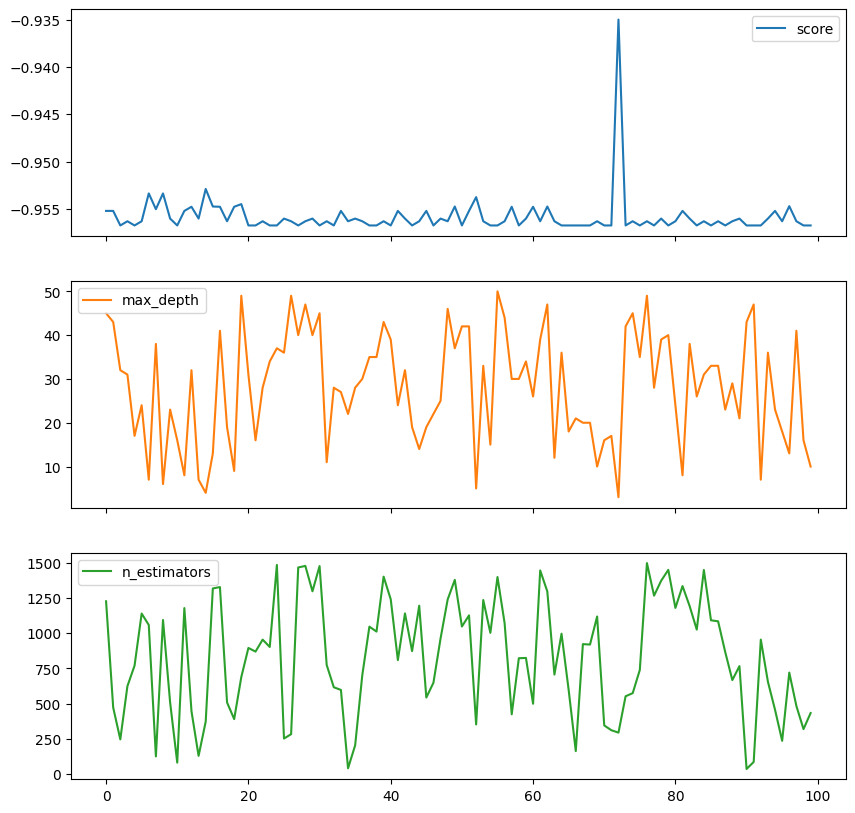

In [287]:
tpe_results=np.array([[x['result']['loss'],
                      x['misc']['vals']['max_depth'][0],
                      x['misc']['vals']['n_estimators'][0]] for x in trials.trials])

tpe_results_df=pd.DataFrame(tpe_results,
                           columns=['score', 'max_depth', 'n_estimators'])

tpe_results_df.plot(subplots=True,figsize=(10, 10));

Во всем диапазоне перебора признаков критерий изменяется менее, чем на 0,3%. Это свидетельствует о том, что данный ансамбль моделей не зависит от гиперпараметров "глубина" и "количество деревьев".
Если сравнивать по качеству работу моделей "дерево решений" и "случайный лес", то можно сказать, что использование ансамбля деревьев является нецелесообразным. Качество моделей одинаковы.

##**Адаптивный бустинг**

In [288]:
# Создаем объект класса дерева решений
dt = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=2, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел 
)
# Создаем объект класса AdaBoost
ada = AdaBoostClassifier(
    base_estimator=dt, #базовая модель
    random_state=42, #датчик генератора случайных чисел
    n_estimators=100 #количество моделей в ансамбле
)
# Обучаем модель
ada.fit(X_train, y_train)

# Формируем предсказание для тренировочной и тестовой выборки
ada_pred  = ada.predict(X_train)
ada_pred_t = ada.predict(X_test)
# Оцениваем качество 
print('метрики на тренировочном наборе:')
print(metrics.classification_report(y_train, ada_pred))
print('метрики на тестовом наборе:')
print(metrics.classification_report(y_test, ada_pred_t))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


метрики на тренировочном наборе:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2741
           1       0.93      0.98      0.96      2945

    accuracy                           0.95      5686
   macro avg       0.96      0.95      0.95      5686
weighted avg       0.96      0.95      0.95      5686

метрики на тестовом наборе:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1175
           1       0.94      0.98      0.96      1263

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



Качество модели осталось прежним. Попробуем подобрать параметры 

In [289]:
# зададим пространство поиска гиперпараметров
space={
      'n_estimators': hp.quniform('n_estimators', 30, 1500, 1),
      'learning_rate' : hp.quniform('learning_rate', 0.5, 5, 0.5)
      }

In [290]:
def hyperopt_rf(params, cv=5, X=X_train, y=y_train, random_state=42):
    # функция получает комбинацию гиперпараметров в "params"
    params = {
              'n_estimators': int(params['n_estimators']), 
              'learning_rate': int(params['learning_rate'])
              }
  
    # используем эту комбинацию для построения модели
    model = AdaBoostClassifier(
        base_estimator=dt, #базовая модель
        random_state=42, #датчик генератора случайных чисел
    )
    # используем кросс-валидацию
    score = cross_val_score(model, X, y, cv=cv, scoring="f1", n_jobs=-1).mean()
    # метрику необходимо минимизировать, поэтому ставим знак минус
    return -score

In [291]:
best = fmin(
    hyperopt_rf, 
    space=space, # пространство гиперпараметров
    algo=tpe.suggest, # алгоритм оптимизации
    max_evals=100, # максимальное количество итераций
    rstate=np.random.default_rng(42) # фиксируем для повторяемости результата
)
print("Наилучшие значения гиперпараметров {}".format(best))

100%|██████████| 100/100 [01:48<00:00,  1.08s/trial, best loss: -0.9567570840824541]
Наилучшие значения гиперпараметров {'learning_rate': 3.5, 'n_estimators': 1226.0}


In [292]:
# рассчитаем точность модели с лучшими параметрами
ada = AdaBoostClassifier( 
    base_estimator=dt, #базовая модель
    random_state=42, #датчик генератора случайных чисел
    n_estimators=1226, #количество моделей в ансамбле
    learning_rate = 3.5
)
# Обучаем модель
ada.fit(X_train, y_train)

# Формируем предсказание для тренировочной и тестовой выборки
ada_pred  = ada.predict(X_train)
ada_pred_t = ada.predict(X_test)
# Оцениваем качество 
print('метрики на тренировочном наборе:')
print(metrics.classification_report(y_train, ada_pred))
print('метрики на тестовом наборе:')
print(metrics.classification_report(y_test, ada_pred_t))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


метрики на тренировочном наборе:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2741
           1       0.93      0.98      0.96      2945

    accuracy                           0.95      5686
   macro avg       0.96      0.95      0.95      5686
weighted avg       0.96      0.95      0.95      5686

метрики на тестовом наборе:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1175
           1       0.94      0.98      0.96      1263

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



Получить повышение качества модели с помощью адаптивного бустинга не удалось

##**Градиентный бустинг**

In [293]:
gb = GradientBoostingClassifier(
    learning_rate=0.05, #темп обучения
    n_estimators=300, #число деревьев
    min_samples_leaf = 2,
    max_depth=7, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)
# Обучаем модель
gb.fit(X_train, y_train)
# Формируем предсказание для тренировочной и тестовой выборки
y_pred = gb.predict(X_train)
y_pred_t = gb.predict(X_test)
# Оцениваем качество 
print("метрики на тренировочном наборе:")
print(metrics.classification_report(y_train, y_pred))
print("метрики на тестовом наборе:")
print(metrics.classification_report(y_test, y_pred_t))

метрики на тренировочном наборе:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2741
           1       0.93      0.98      0.96      2945

    accuracy                           0.95      5686
   macro avg       0.96      0.95      0.95      5686
weighted avg       0.96      0.95      0.95      5686

метрики на тестовом наборе:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1175
           1       0.94      0.98      0.96      1263

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



Автоматический подбор параметров

In [294]:
# зададим пространство поиска гиперпараметров
space={'n_estimators': hp.quniform('n_estimators', 30, 1500, 1),
       'max_depth': hp.quniform('max_depth', 2, 20, 1),
       'learning_rate' : hp.quniform('learning_rate', 0.01, 1.1, 0.01),
       'min_samples_leaf':  hp.quniform('min_samples_leaf',2, 10, 1)
      }

In [295]:
def hyperopt_rf(params, cv=5, X=X_train, y=y_train, random_state=42):
    # функция получает комбинацию гиперпараметров в "params"
    params = {'n_estimators': int(params['n_estimators']), 
             'learning_rate': int(params['learning_rate']),
              'max_depth': int(params['max_depth']),
              'min_samples_leaf': int(params['min_samples_leaf'])
              }
  
    # используем эту комбинацию для построения модели
    model = GradientBoostingClassifier(
        learning_rate=0.05, #темп обучения
        random_state=42 #генератор случайных чисел
    )
    # используем кросс-валидацию
    score = cross_val_score(model, X, y, cv=cv, scoring="f1", n_jobs=-1).mean()
    # метрику необходимо минимизировать, поэтому ставим знак минус
    return -score

In [296]:
best = fmin(
    hyperopt_rf, 
    space=space, # пространство гиперпараметров
    algo=tpe.suggest, # алгоритм оптимизации
    max_evals=100, # максимальное количество итераций
    rstate=np.random.default_rng(42) # фиксируем для повторяемости результата
)
print("Наилучшие значения гиперпараметров {}".format(best))

100%|██████████| 100/100 [01:48<00:00,  1.09s/trial, best loss: -0.9555203947222376]
Наилучшие значения гиперпараметров {'learning_rate': 0.72, 'max_depth': 18.0, 'min_samples_leaf': 7.0, 'n_estimators': 1226.0}


In [297]:
# рассчитаем точность модели с лучшими параметрами
gb = GradientBoostingClassifier(
    learning_rate=0.72, #темп обучения
    n_estimators=1226, #число деревьев
    min_samples_leaf = 7,
    max_depth=18, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)
# Обучаем модель
gb.fit(X_train, y_train)
# Формируем предсказание для тренировочной и тестовой выборки
y_pred = gb.predict(X_train)
y_pred_t = gb.predict(X_test)
# Оцениваем качество 
print("метрики на тренировочном наборе:")
print(metrics.classification_report(y_train, y_pred))
print("метрики на тестовом наборе: ")
print(metrics.classification_report(y_test, y_pred_t))

метрики на тренировочном наборе:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2741
           1       0.93      0.98      0.96      2945

    accuracy                           0.95      5686
   macro avg       0.96      0.95      0.95      5686
weighted avg       0.96      0.95      0.95      5686

метрики на тестовом наборе: 
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1175
           1       0.94      0.98      0.96      1263

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



##**VotingClassifier**

In [298]:
clf1 = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=42 #генератор случайных чисел,
    )
clf2 = linear_model.LogisticRegression(
    penalty = 'none', # тип регуляризации
    solver = 'lbfgs',# алгоритм оптимизации
    random_state=42 #генератор случайных чисел
    )
clf3 = svm.NuSVC(
    gamma= 'scale', 
    random_state=42
    )
eclf = VotingClassifier(estimators=[ ('dt_clf', clf1), ('log_reg', clf2),('clf', clf3)], voting='hard') # задаем метод голосования через большинство 

params = {
          'dt_clf__max_depth': [ 6, 7, 8],
          'dt_clf__min_samples_split': [2, 5],  
          'log_reg__C': [0.0005, 0.001, 0.0015, 0.01],
          'clf__nu': [0.05, 0.1, 0.15, 0.2],
          'clf__kernel': ['poly', 'rbf', 'sigmoid'],
        }  # задаем сетку параметров для перебора и сравнения, 

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5, scoring='f1', n_jobs=-1)
grid = grid.fit(X_train, y_train) # когда задали все условия, проводим обучение и оптимизацию на 5 фолдах на собранной обучающий выборке 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


In [299]:
print("Наилучшие значения параметров: {}".format(grid.best_params_))
print("accuracy на тренировочном наборе: {:.2f}".format(grid.score(X_train, y_train)))
print("accuracy на тестовом наборе: {:.2f}".format(grid.score(X_test, y_test)))
y_train_pred = grid.predict(X_train)
print('f1_score на тренировочном наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = grid.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Наилучшие значения параметров: {'clf__kernel': 'sigmoid', 'clf__nu': 0.05, 'dt_clf__max_depth': 7, 'dt_clf__min_samples_split': 2, 'log_reg__C': 0.0005}
accuracy на тренировочном наборе: 0.96
accuracy на тестовом наборе: 0.96
f1_score на тренировочном наборе: 0.96
f1_score на тестовом наборе: 0.96


Результаты улучшить не удалось

##**Стекинг**

In [300]:
# объединяем рассмотренные алгоритмы с помощью стекинга 
# В качестве моделей возьмем рассмотренные ранее, с выбранными параметрами
estimators = [
    ('dt_clf', tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=2, #минимальное число объектов в листе
    random_state=42 #генератор случайных чисел),
    )),
    ('log_reg', linear_model.LogisticRegression(
    C = 0.001,
    penalty = 'none', 
    solver = 'lbfgs',
    random_state=42 #генератор случайных чисел
    )),
    ('clf', svm.NuSVC(
    gamma= 'scale', 
    kernel= 'poly', 
    nu = 0.1,
    random_state=42 #генератор случайных чисел
    ))
]
#Создаем объект класса стекинг
clf_stack = StackingClassifier(
    estimators=estimators,
    final_estimator=linear_model.LogisticRegression()
)
 
#Обучаем модель
clf_stack.fit(X_train, y_train)
# Формируем предсказание для тренировочной и тестовой выборки
y_pred = clf_stack.predict(X_train)
y_pred_t = clf_stack.predict(X_test)
# Оцениваем качество 
print("метрики на тренировочном наборе:")
print(metrics.classification_report(y_train, y_pred))
print("метрики на тестовом наборе:")
print(metrics.classification_report(y_test, y_pred_t))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

метрики на тренировочном наборе:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2741
           1       0.93      0.98      0.96      2945

    accuracy                           0.95      5686
   macro avg       0.96      0.95      0.95      5686
weighted avg       0.96      0.95      0.95      5686

метрики на тестовом наборе:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1175
           1       0.94      0.98      0.96      1263

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



In [301]:
# объединяем рассмотренные ансамбли с помощью стекинга 
# В качестве моделей возьмем рассмотренные ранее , с выбранными параметрами
estimators = [
    ('ada', AdaBoostClassifier(
      base_estimator=dt, #базовая модель
      random_state=42, #датчик генератора случайных чисел
      n_estimators=1226, #количество моделей в ансамбле
      learning_rate = 3.5
    )),
    ('rf_clf', ensemble.RandomForestClassifier(
    n_estimators=246, #число деревьев
    criterion='gini', #критерий эффективности
    max_depth=32, #максимальная глубина дерева
    min_samples_leaf = 2,
    random_state=42 #генератор случайных чисел
    )),
    ('gb', GradientBoostingClassifier(
    learning_rate=0.72, #темп обучения
    n_estimators=1226, #число деревьев
    min_samples_leaf = 7,
    max_depth=18, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
    ))
]
#Создаем объект класса стекинг
clf = StackingClassifier(
    estimators=estimators
    #final_estimator=ensemble.RandomForestRegressor()
)
 
#Обучаем модель
clf.fit(X_train, y_train)

# Формируем предсказание для тренировочной и тестовой выборки
y_pred = clf.predict(X_train)
y_pred_t = clf.predict(X_test)
# Оцениваем качество 
print("метрики на тренировочном наборе:")
print(metrics.classification_report(y_train, y_pred))
print("метрики на тестовом наборе:")
print(metrics.classification_report(y_test, y_pred_t))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

метрики на тренировочном наборе:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2741
           1       0.93      0.98      0.96      2945

    accuracy                           0.95      5686
   macro avg       0.96      0.95      0.95      5686
weighted avg       0.96      0.95      0.95      5686

метрики на тестовом наборе:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1175
           1       0.94      0.98      0.96      1263

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



# **7. Решение задачи классификации: нейросеть**

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 10)                110       
                                                                 
 dense_44 (Dense)            (None, 10)                110       
                                                                 
 dense_45 (Dense)            (None, 1)                 11        
                                                                 
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________


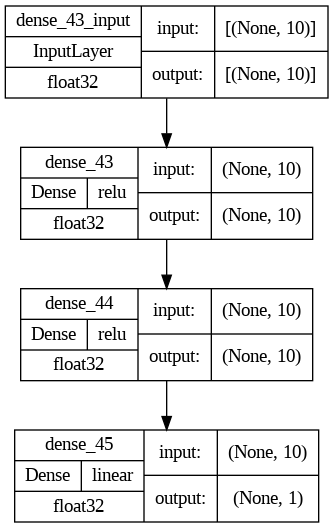

In [302]:

# Создание топологии сети
net_model = models.Sequential(
                                [
                                    layers.Dense(10, input_shape=(X_train.shape[1],), activation="relu"), # "sigmoid" "relu" "selu" "elu" "softmax" "softplus" "softsign" "tanh"
                                    layers.Dense(10, activation="relu"), #
                                #    layers.Dense(50, activation="relu"), #
                                    layers.Dense(1),
                                ]
                            )

net_model.summary()

keras.utils.plot_model(net_model, to_file="net_model.png",
                       show_shapes=True,
                       show_dtype=True,
                       show_layer_activations=True,
                       show_layer_names=True)


In [308]:
# Обучение сети
net_model.compile(optimizer= tf.keras.optimizers.Adam(0.0001), # "sgd", "rmsprop", "adam" or tf.keras.optimizers.Adam(0.0001)
                  loss="mse",         # "mae", "mse", 'categorical_crossentropy'
                  metrics=["mse"])    # "mae", "mse", 'accuracy'

net_model.fit(X_train, y_train, epochs=1000, batch_size=64, verbose=1)

# предсказание
y_train_pred = net_model.predict(X_train)
y_test_pred = net_model.predict(X_test)


Epoch 1/1000
89/89 [==============================] - 4s 8ms/step - loss: 0.0407 - mse: 0.0407
Epoch 2/1000
89/89 [==============================] - 1s 8ms/step - loss: 0.0406 - mse: 0.0406
Epoch 3/1000
89/89 [==============================] - 1s 7ms/step - loss: 0.0406 - mse: 0.0406
Epoch 4/1000
89/89 [==============================] - 0s 3ms/step - loss: 0.0405 - mse: 0.0405
Epoch 5/1000
89/89 [==============================] - 0s 4ms/step - loss: 0.0405 - mse: 0.0405
Epoch 6/1000
89/89 [==============================] - 0s 5ms/step - loss: 0.0404 - mse: 0.0404
Epoch 7/1000
89/89 [==============================] - 0s 3ms/step - loss: 0.0404 - mse: 0.0404
Epoch 8/1000
89/89 [==============================] - 0s 4ms/step - loss: 0.0403 - mse: 0.0403
Epoch 9/1000
89/89 [==============================] - 0s 3ms/step - loss: 0.0403 - mse: 0.0403
Epoch 10/1000
89/89 [==============================] - 0s 4ms/step - loss: 0.0402 - mse: 0.0402
Epoch 11/1000
89/89 [============================

In [309]:
def to_bool(x,por):
  '''функция преобразования вероятности в бинарный класс
  по порогу por'''
  y= np.zeros(x.shape)
  for i in range(1,x.shape[0]):
    if(x[i]>por):
      y[i]= 1
  return y

In [310]:
# оценка качества
y_train_pred_bool= to_bool(y_train_pred, 0.5) 
y_test_pred_bool= to_bool(y_test_pred,0.5)  

# Оцениваем качество 
print("метрики на тренировочном наборе:")
print(metrics.classification_report(y_train, y_train_pred_bool))
print("метрики на тестовом наборе:")
print(metrics.classification_report(y_test, y_test_pred_bool))

метрики на тренировочном наборе:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2741
           1       0.93      0.98      0.96      2945

    accuracy                           0.95      5686
   macro avg       0.96      0.95      0.95      5686
weighted avg       0.96      0.95      0.95      5686

метрики на тестовом наборе:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1175
           1       0.94      0.98      0.96      1263

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



Оценка распределения выходной вероятности отнесения к классу

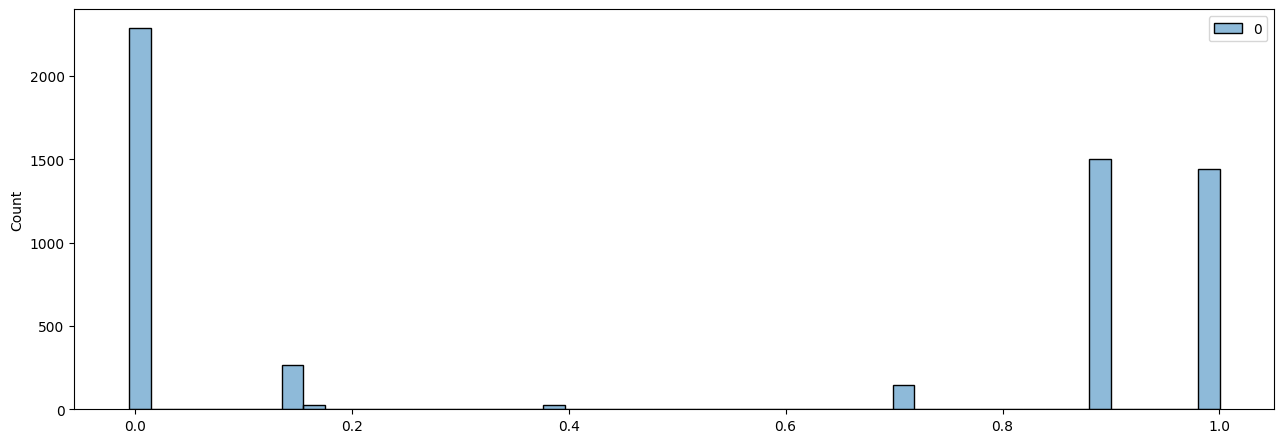

In [311]:
fig = plt.figure(figsize=(6,2))
axes = fig.add_axes([-1,0,2,2])
histplot = sns.histplot(y_train_pred, bins= 50, ax=axes)

Как видно из графика, данные хорошо разделяются. Есть незначительное количество результатов с вероятностью 0.4. Попробуем проверить, улучшится ли статистика при изменении порога отнесения к классу.

In [312]:
max_score= 0
p_opt= 0
for p in range(20,80):
  p=p*0.01
  y_train_pred_bool= to_bool(y_train_pred, p) 
  y_test_pred_bool= to_bool(y_test_pred, p)  
  if( metrics.accuracy_score(y_train, y_train_pred_bool) > max_score ):
    max_score= metrics.accuracy_score(y_train, y_train_pred_bool)
    p_opt= p

print(f'Оптимальный порог {p_opt}')
y_train_pred_bool= to_bool(y_train_pred, p_opt) 
y_test_pred_bool= to_bool(y_test_pred, p_opt)  
print("метрики на тренировочном наборе: ")
print(metrics.classification_report(y_train, y_train_pred_bool))
print("метрики на тестовом наборе: ")
print(metrics.classification_report(y_test, y_test_pred_bool))


Оптимальный порог 0.4
метрики на тренировочном наборе: 
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2741
           1       0.93      0.98      0.96      2945

    accuracy                           0.95      5686
   macro avg       0.96      0.95      0.95      5686
weighted avg       0.96      0.95      0.95      5686

метрики на тестовом наборе: 
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1175
           1       0.94      0.98      0.96      1263

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



Перебор показал оптимальный порог 0.4, но из графика видно, что выборка хорошо разделяется и между значениями 0.4 и 0.65 результатов нет. Поэтому логично в качестве порога оставить значение 0.5.
Поскольку поставленная задача состоит в пороговом разделении на два класса, ожидаемо подтвердилось, что усложнение топологии сети не приводит к улучшению качества результата. Т.е. при увеличении количества слоёв и нейронов в слое модель сходится к таким же значениям метрик качества. 

# **Результаты**
***В процессе работы было проведено исследование возможности бинарной классификации грибов по их внешним параметрам. Проведен анализ данных, оценена значимость признаков, составлен набор оптимальной комбинации линейно независимых признаков. Исследование показало, что результаты классификации для всех всех рассмотренных типов моделей (логистическая регрессия, решающее дерево, метод опорных векторов, нейронная сеть), а также ансамблей (случайный лес, адаптивный бустинг, градиентный бустинг, VotingClassifier, стекинг) дает однинаковые метрики качества (accracy = 0.96, f1 = 0.96). Из чего следует, что оставшаяся часть неверно классифицированных данных не может быть разделена на верные классы в рассматриваемом пространстве признаков. Поэтому целесообразно использовать для решения поставленной задачи наиболее простую в обучении и применении модель - логистическую регрессию со следующими параметрами: C=0.001, penalty='none', solver ='lbfgs', max_iter=1000***.



